# <font color="red"><p align="center">📌 Inferential Statistical Analysis</p></font>
<p align="center">Hypothesis 2</p1>

In [1]:
import pandas as pd         
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns  
import math    
from scipy.stats import chi2_contingency  
from wordcloud import WordCloud  
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy.stats import kruskal

import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel



In [2]:
file_path = "df_cleaned.xlsx"
df_hy2 = pd.read_excel(file_path)

In [3]:
pd.set_option('display.max_columns', None)  # for showing all columns
pd.set_option('display.expand_frame_repr', False)  # this prevent wrapping to new lines
print(df_hy2.head())

  Age_Range  Gender Occupation    Hometown Aware_Shutdown Internet_Usage_BS Internet_Reliance_BS IS_Affect_Daily_Routine Change_Digital_Dependency Reconsider_Offline_Alternatives Justify_Shutdown_in_Certain_Situation S_Limit_Freedom_of_Speech Shutdown_Effectiveness_in_GIP Future_Acceptance_of_S_for_NS Protest_Hindrance_AG Future_Civic_Engagement_if_ASO     ISLAC_Protest_CM Primary_Communication_Mode_BS Comm_Disruption_due_to_S Social_Media_Usage_Change_AS Switch_Alt_Comm_Methods_DS News_Reliance_on_Internet_BS Mental_Impact_of_S                               Coping_Strategy_DS     Lasting_Impact_on_MH        CORS_on_National_Stability          Democracy_Perception_if_SDOA ISR_in_GPC_in_Bang
0     18-29  Female    Student  Chattogram            Yes         2-4 hours             A little                      No                 No change                              No                               Neutral                Not at all                       Neutral                       Neutr

#### ✅ Step 4: Hypothesis (2) Testing

In [4]:
"""
Impact of Repeated Internet Shutdowns on Mental Health and Psychological Well-being.
  Null Hypothesis (H₀): Prolonged and repeated internet shutdowns have no significant impact on individuals' psychological well-being or mental distress.
  Alternative Hypothesis (H₁): Prolonged and repeated internet shutdowns lead to increased mental distress, negatively impacting individuals' psychological well-being.
  
  🔹 Variables:
        • Independent Variable: Aware_Shutdown
                                Internet_Reliance_BS 
                                Internet_Usage_BS 
                                IS_Affect_Daily_Routine
                                Change_Digital_Dependency
                                Reconsider_Offline_Alternatives
                                Comm_Disruption_due_to_S
                                Social_Media_Usage_Change_AS
                                Coping_Strategy_DS
        • Dependent Variable:   Mental_Impact_of_S
                                Lasting_Impact_on_MH
"""

"\nImpact of Repeated Internet Shutdowns on Mental Health and Psychological Well-being.\n  Null Hypothesis (H₀): Prolonged and repeated internet shutdowns have no significant impact on individuals' psychological well-being or mental distress.\n  Alternative Hypothesis (H₁): Prolonged and repeated internet shutdowns lead to increased mental distress, negatively impacting individuals' psychological well-being.\n  \n  🔹 Variables:\n        • Independent Variable: Aware_Shutdown\n                                Internet_Reliance_BS \n                                Internet_Usage_BS \n                                IS_Affect_Daily_Routine\n                                Change_Digital_Dependency\n                                Reconsider_Offline_Alternatives\n                                Comm_Disruption_due_to_S\n                                Social_Media_Usage_Change_AS\n                                Coping_Strategy_DS\n        • Dependent Variable:   Mental_Impact_of_S\n       

4.1: Association Testing: Chi-Square Test & Bonferroni Correction

###### 4.1.1: Data Assumption Check (Verify Expected Frequencies (≥5) for Chi-square Test)

In [5]:
dependent_vars = [
    'Mental_Impact_of_S',
    'Lasting_Impact_on_MH'
]

independent_vars = [
    'Aware_Shutdown',
    'Internet_Reliance_BS',
    'Internet_Usage_BS',
    'IS_Affect_Daily_Routine',
    'Change_Digital_Dependency',
    'Reconsider_Offline_Alternatives',
    'Comm_Disruption_due_to_S',
    'Social_Media_Usage_Change_AS',
    'Coping_Strategy_DS'   
]

# Function to check expected frequencies
def check_expected_frequencies(df, dep_var, indep_var):
    contingency_table = pd.crosstab(df[dep_var], df[indep_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    expected_df = pd.DataFrame(expected,
                               index=contingency_table.index,
                               columns=contingency_table.columns)
    below_5 = (expected_df < 5).sum().sum()
    print(f"\n✅ Checking Pair: {dep_var} ↔ {indep_var}")
    print("="*100)
    print("Contingency Table:\n", contingency_table)
    print("\nExpected Frequencies:\n", expected_df.round(2))
    if below_5 > 0:
        print(f"\n⚠️ Warning: {below_5} cells have expected frequencies below 5. Consider merging categories.\n")
    else:
        print("✅ All expected frequencies ≥ 5. Good to proceed.\n")


# Loop through all pairs and check assumptions
for dep in dependent_vars:
    for indep in independent_vars:
        check_expected_frequencies(df_hy2, dep, indep)


✅ Checking Pair: Mental_Impact_of_S ↔ Aware_Shutdown
Contingency Table:
 Aware_Shutdown          No  Yes
Mental_Impact_of_S             
No change               46  294
Significantly improved   7   15
Significantly worsened  19  284
Slightly improved       32  140
Slightly worsened       42  388

Expected Frequencies:
 Aware_Shutdown             No     Yes
Mental_Impact_of_S                   
No change               39.18  300.82
Significantly improved   2.54   19.46
Significantly worsened  34.92  268.08
Slightly improved       19.82  152.18
Slightly worsened       49.55  380.45

⚠️ Warning: 1 cells have expected frequencies below 5. Consider merging categories.


✅ Checking Pair: Mental_Impact_of_S ↔ Internet_Reliance_BS
Contingency Table:
 Internet_Reliance_BS    A little  Extremely  Moderately  Not at all
Mental_Impact_of_S                                                 
No change                     75         69         177          19
Significantly improved        10          

In [6]:
# Define a function to merge categories in the 'Mental_Impact_of_S' column for df_hyp2
def merge_mental_impact(category):
    if category in ['Slightly worsened', 'Significantly worsened']:
        return 'Negative Impact'
    elif category in ['Slightly improved', 'Significantly improved']:
        return 'Positive Impact'
    else:
        return 'No Impact'

# Apply the function to transform the column in df_hyp2
df_hy2['Mental_Impact_of_S'] = df_hy2['Mental_Impact_of_S'].apply(merge_mental_impact)

# Display the updated value counts to verify changes
df_hy2['Mental_Impact_of_S'].value_counts()


Mental_Impact_of_S
Negative Impact    733
No Impact          340
Positive Impact    194
Name: count, dtype: int64

In [7]:
# Loop through all pairs and check assumptions
for dep in dependent_vars:
    for indep in independent_vars:
        check_expected_frequencies(df_hy2, dep, indep)


✅ Checking Pair: Mental_Impact_of_S ↔ Aware_Shutdown
Contingency Table:
 Aware_Shutdown      No  Yes
Mental_Impact_of_S         
Negative Impact     61  672
No Impact           46  294
Positive Impact     39  155

Expected Frequencies:
 Aware_Shutdown         No     Yes
Mental_Impact_of_S               
Negative Impact     84.47  648.53
No Impact           39.18  300.82
Positive Impact     22.36  171.64
✅ All expected frequencies ≥ 5. Good to proceed.


✅ Checking Pair: Mental_Impact_of_S ↔ Internet_Reliance_BS
Contingency Table:
 Internet_Reliance_BS  A little  Extremely  Moderately  Not at all
Mental_Impact_of_S                                               
Negative Impact            158        181         373          21
No Impact                   75         69         177          19
Positive Impact             48         27         106          13

Expected Frequencies:
 Internet_Reliance_BS  A little  Extremely  Moderately  Not at all
Mental_Impact_of_S                        

###### 4.1.2: Perform Chi-square Test of Independence

In [8]:
results = []

for dep in dependent_vars:
    for indep in independent_vars:
        contingency_table = pd.crosstab(df_hy2[dep], df_hy2[indep])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Bias-corrected Cramér’s V calculation
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
        rcorr = r - ((r - 1)**2) / (n - 1)
        kcorr = k - ((k - 1)**2) / (n - 1)
        cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

        # Append results clearly
        results.append({
            'Dependent Variable': dep,
            'Independent Variable': indep,
            'Chi-square Statistic': round(chi2, 4),
            'Degrees of Freedom': dof,
            'P-value': round(p, 4),
            'Effect Size (Bias-Corrected Cramér’s V)': round(cramers_v, 4),
            'Significance': 'Significant ✅' if p < 0.05 else 'Not Significant ❌'
        })

chi_square_results_df_corrected = pd.DataFrame(results)

print("\nChi-square Test Summary Table (Bias-Corrected Cramér’s V):")
print("===============================================================")
print(chi_square_results_df_corrected)


Chi-square Test Summary Table (Bias-Corrected Cramér’s V):
      Dependent Variable             Independent Variable  Chi-square Statistic  Degrees of Freedom  P-value  Effect Size (Bias-Corrected Cramér’s V)       Significance
0     Mental_Impact_of_S                   Aware_Shutdown               22.7175                   2   0.0000                                   0.1279      Significant ✅
1     Mental_Impact_of_S             Internet_Reliance_BS               17.3896                   6   0.0080                                   0.0671      Significant ✅
2     Mental_Impact_of_S                Internet_Usage_BS               15.7556                   6   0.0151                                   0.0621      Significant ✅
3     Mental_Impact_of_S          IS_Affect_Daily_Routine               51.5932                   4   0.0000                                   0.1372      Significant ✅
4     Mental_Impact_of_S        Change_Digital_Dependency               73.0635                

###### 4.1.3: Interpret Results in Simple words

In [9]:
"""
📌 Summary of Key Findings:
1. Awareness & Mental Health – People aware of the shutdown suffered more mental distress (p < 0.05).
2. Internet Reliance & Usage – Those heavily dependent on the internet before the shutdown faced 
    worse mental health impacts.
3. Routine Disruption – Losing daily internet access significantly affected mental well-being.
4. Increased Digital Dependency – People who became more reliant on digital platforms post-shutdown 
    experienced greater stress.
"""

'\n📌 Summary of Key Findings:\n1. Awareness & Mental Health – People aware of the shutdown suffered more mental distress (p < 0.05).\n2. Internet Reliance & Usage – Those heavily dependent on the internet before the shutdown faced \n    worse mental health impacts.\n3. Routine Disruption – Losing daily internet access significantly affected mental well-being.\n4. Increased Digital Dependency – People who became more reliant on digital platforms post-shutdown \n    experienced greater stress.\n'

###### 4.1.4: Visualization

###### 4.1.4.1: Clustered Column Chart (shows distributions clearly)

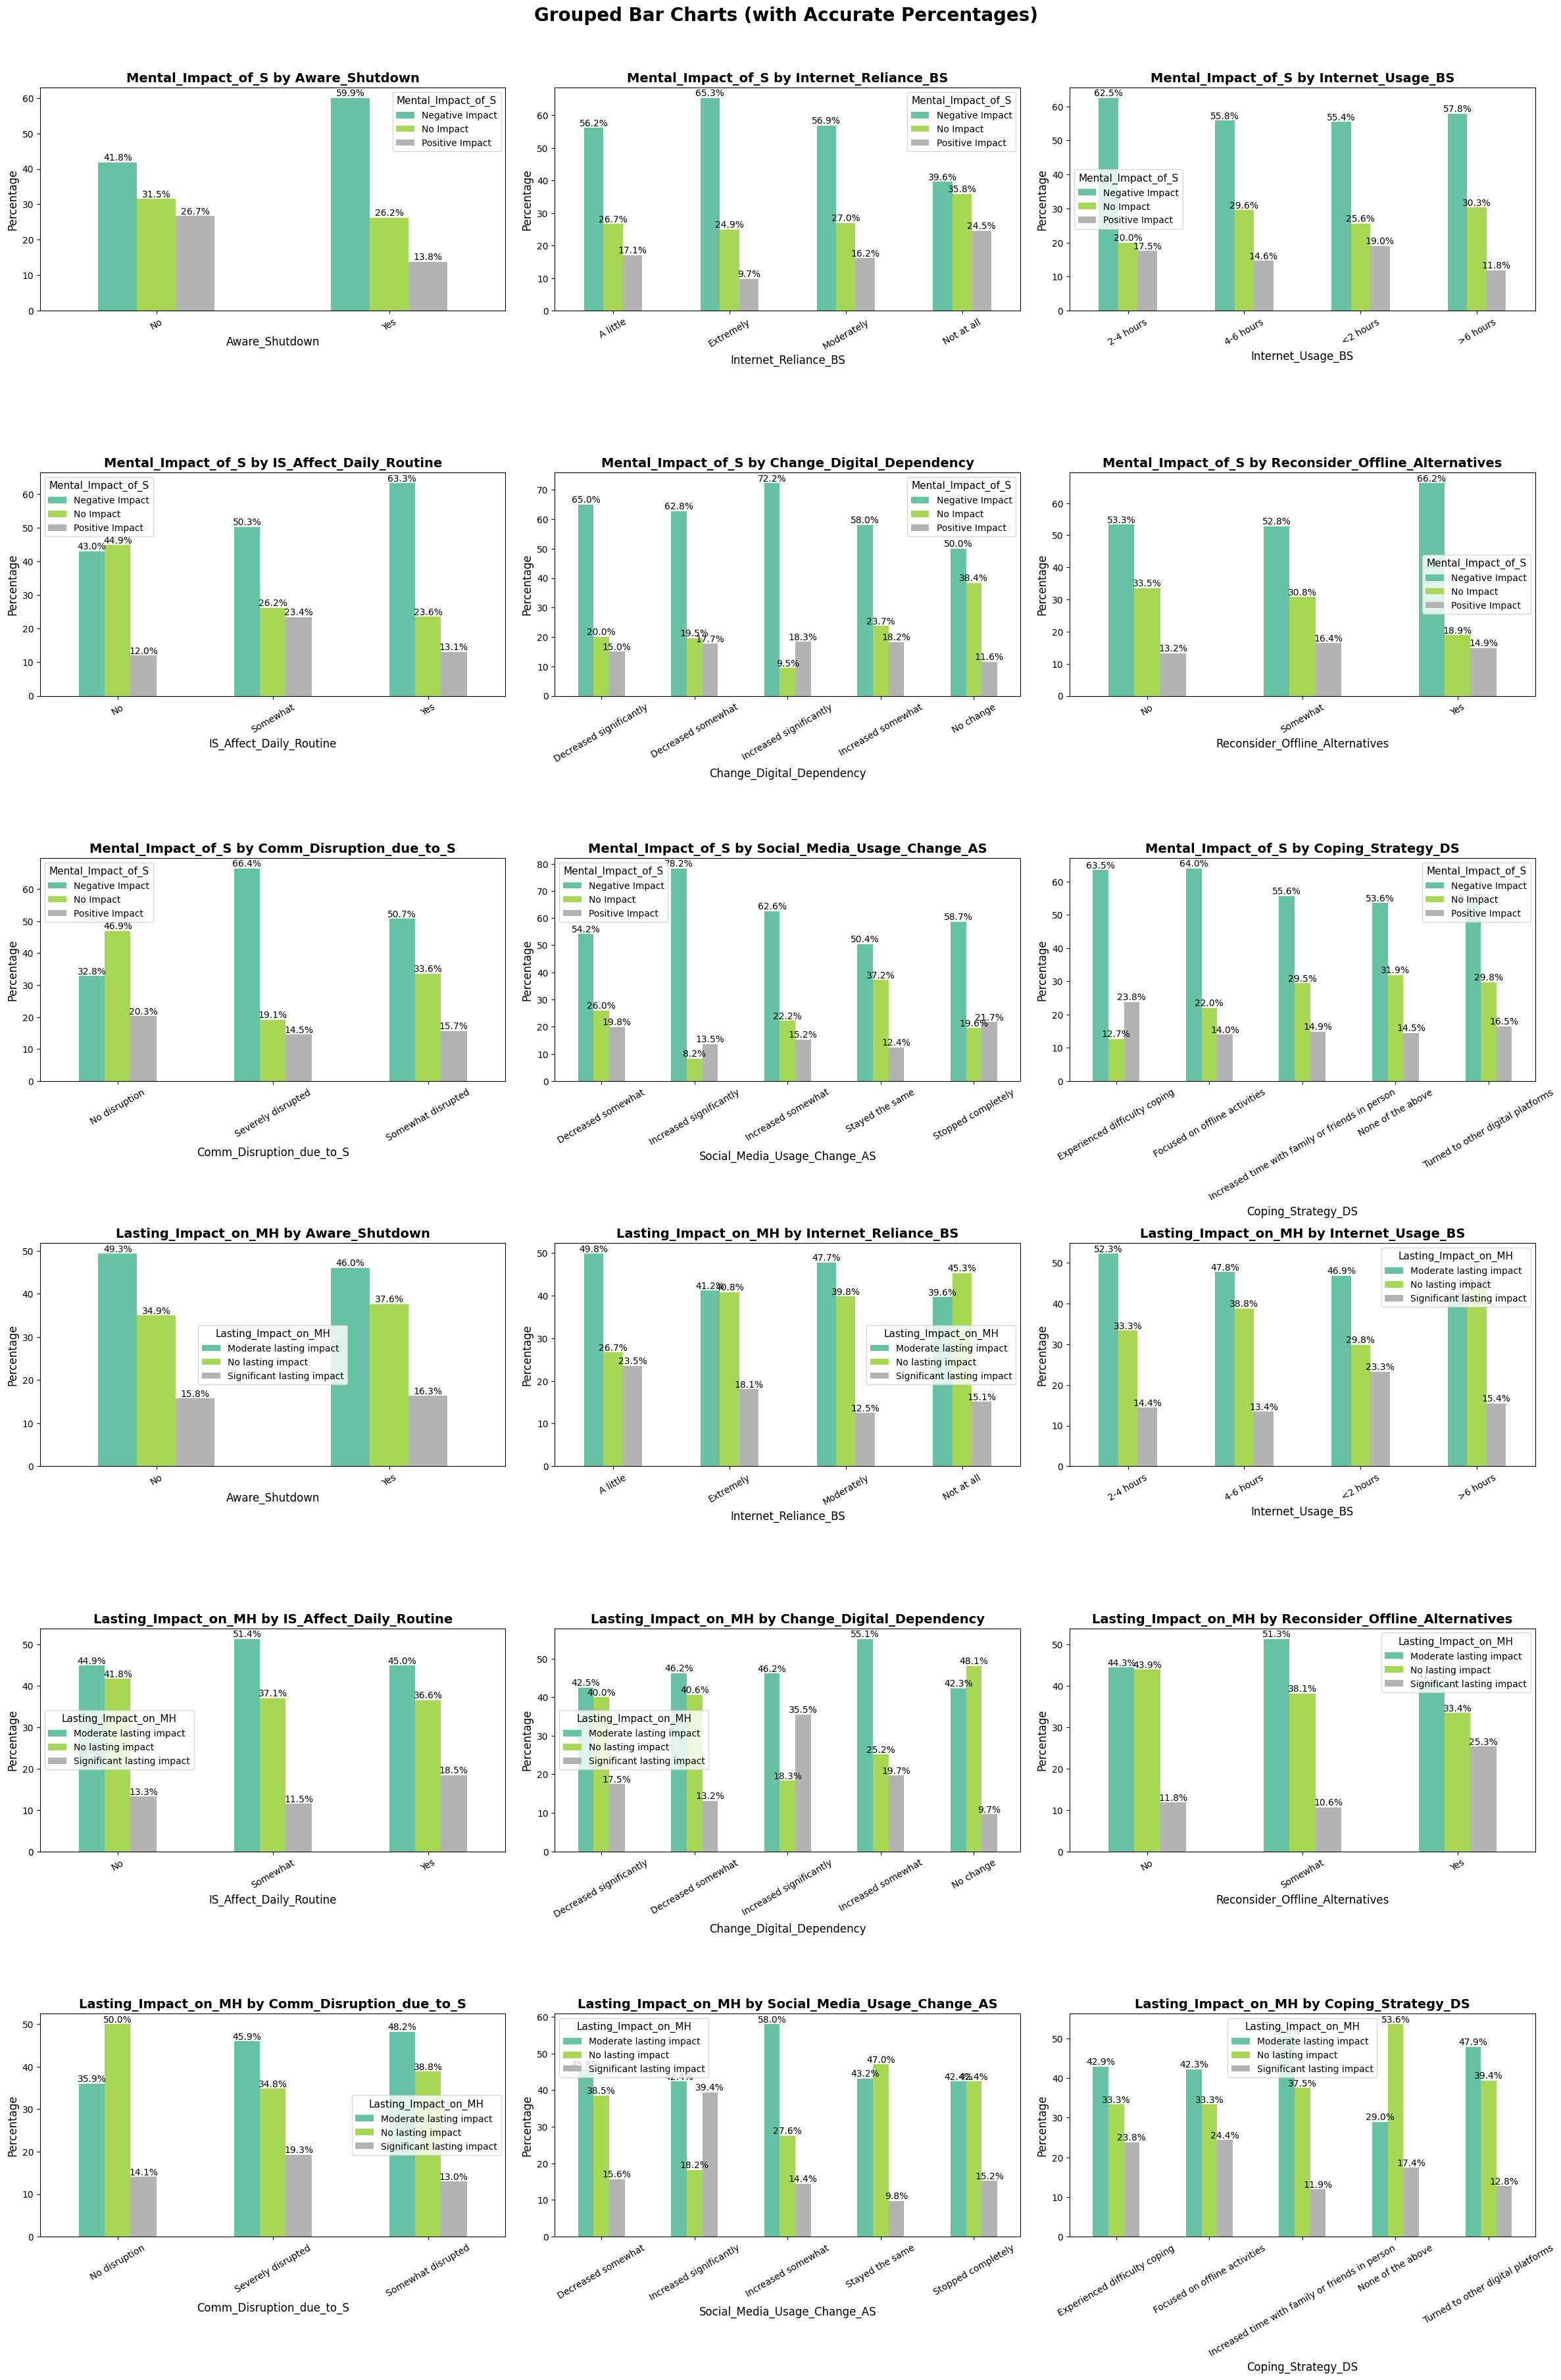

In [10]:
import matplotlib.pyplot as plt

# Define all variable pairs for the hypothesis
all_pairs = [(dep, indep) for dep in dependent_vars for indep in independent_vars]

# Setup subplot grid dimensions dynamically
rows, cols = (len(all_pairs) // 3) + 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(24, rows * 6))
axes = axes.flatten()

# Function to plot grouped bar charts with accurate percentages
for idx, (dep_var, indep_var) in enumerate(all_pairs):
    ax = axes[idx]

    # Cross-tabulation to calculate percentages
    ctab = pd.crosstab(df_hy2[indep_var], df_hy2[dep_var])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    ctab_percent.plot(kind='bar', ax=ax, colormap='Set2', legend=True)

    # Annotate percentages accurately
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x, height), ha='center', va='bottom', fontsize=10)

    ax.set_title(f'{dep_var} by {indep_var}', fontsize=14, fontweight='bold')
    ax.set_xlabel(indep_var, fontsize=12)
    ax.set_ylabel('Percentage', fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title=dep_var, fontsize=10, title_fontsize=11)

# Hide unused axes
for idx in range(len(all_pairs), len(axes)):
    fig.delaxes(axes[idx])

fig.suptitle('Grouped Bar Charts (with Accurate Percentages)', fontsize=20, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.94])

# Show the plot
plt.show()


###### 4.1.4.2: Heatmap (Crosstab) (visualizes relationships between variables clearly)

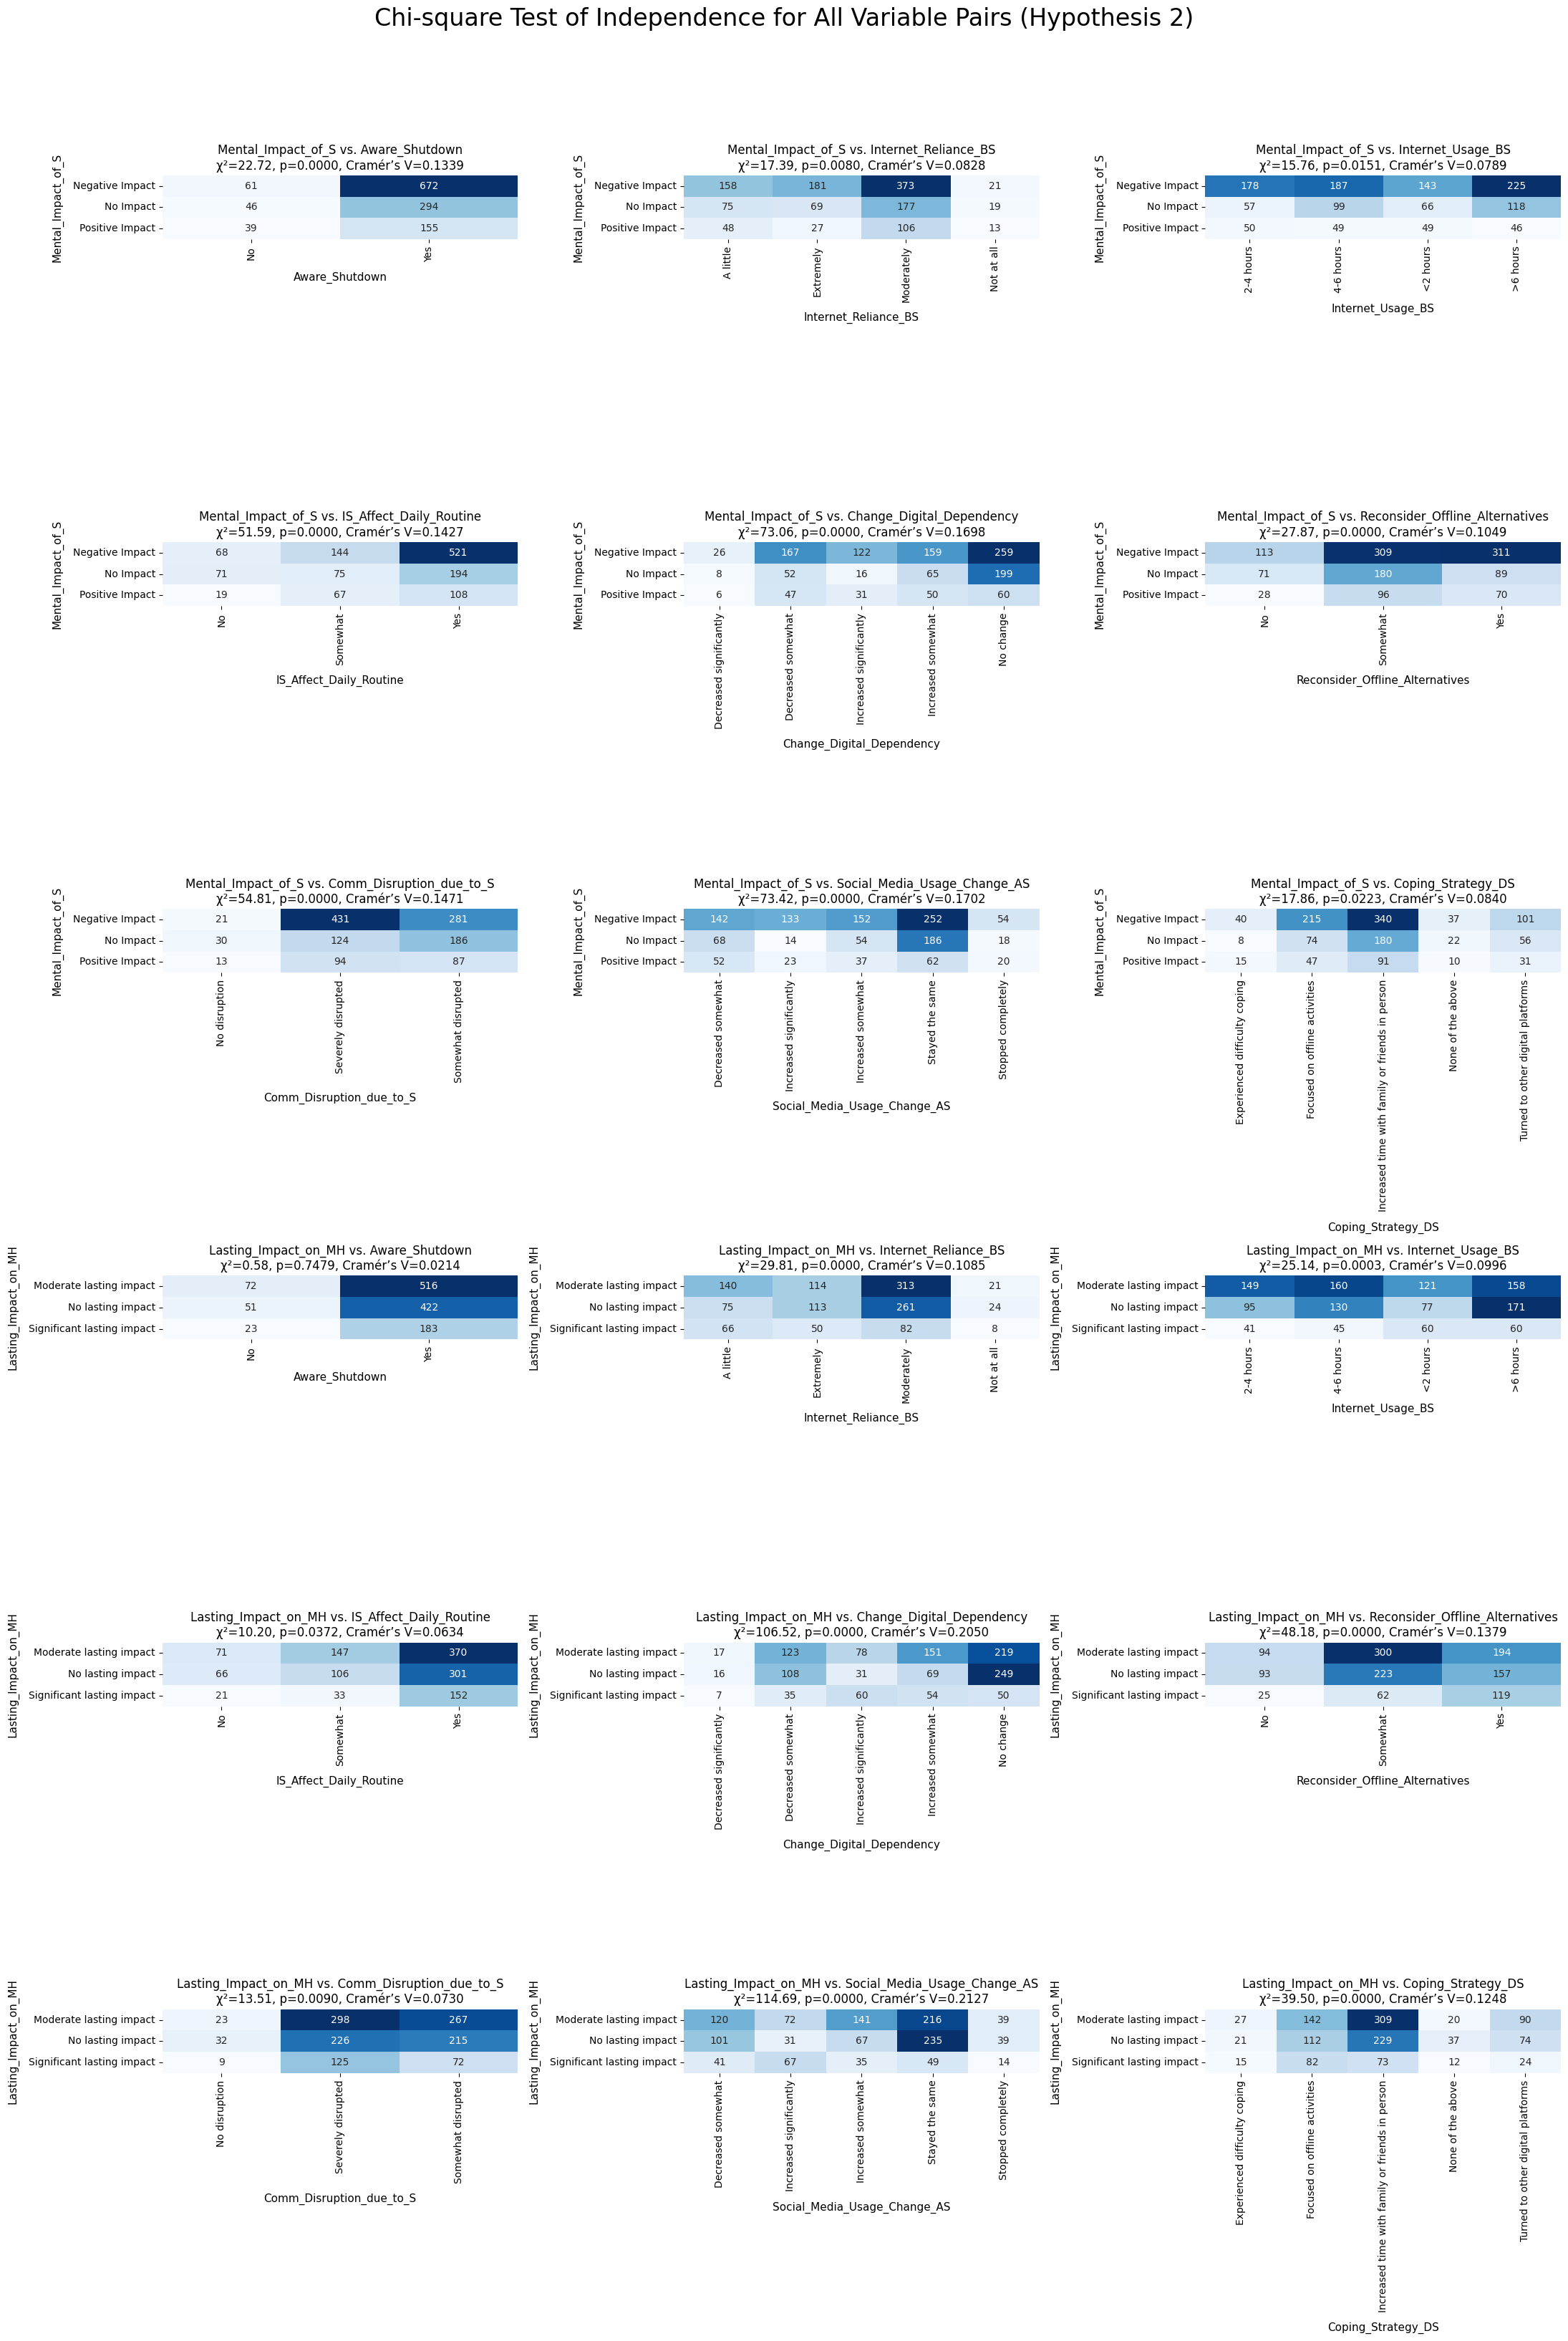

In [11]:
# Define all tested variable pairs
 # all_pairs = [(dep, indep) for dep in dependent_vars for indep in independent_vars]

all_pairs = [
    ('Mental_Impact_of_S', 'Aware_Shutdown'),
    ('Mental_Impact_of_S', 'Internet_Reliance_BS'),
    ('Mental_Impact_of_S', 'Internet_Usage_BS'),
    ('Mental_Impact_of_S', 'IS_Affect_Daily_Routine'),
    ('Mental_Impact_of_S', 'Change_Digital_Dependency'),
    ('Mental_Impact_of_S', 'Reconsider_Offline_Alternatives'),
    ('Mental_Impact_of_S', 'Comm_Disruption_due_to_S'),
    ('Mental_Impact_of_S', 'Social_Media_Usage_Change_AS'),
    ('Mental_Impact_of_S', 'Coping_Strategy_DS'),
    ('Lasting_Impact_on_MH', 'Aware_Shutdown'),
    ('Lasting_Impact_on_MH', 'Internet_Reliance_BS'),
    ('Lasting_Impact_on_MH', 'Internet_Usage_BS'),
    ('Lasting_Impact_on_MH', 'IS_Affect_Daily_Routine'),
    ('Lasting_Impact_on_MH', 'Change_Digital_Dependency'),
    ('Lasting_Impact_on_MH', 'Reconsider_Offline_Alternatives'),
    ('Lasting_Impact_on_MH', 'Comm_Disruption_due_to_S'),
    ('Lasting_Impact_on_MH', 'Social_Media_Usage_Change_AS'),
    ('Lasting_Impact_on_MH', 'Coping_Strategy_DS')
]



# Setup subplot grid dimensions
rows = 6
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(22, 32))  # Bigger figure size for better spacing

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each variable pair
for i, (dep_var, indep_var) in enumerate(all_pairs):
    contingency_table = pd.crosstab(df_hy2[dep_var], df_hy2[indep_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = (chi2 / (n * min_dim)) ** 0.5

    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)

    # Title
    axes[i].set_title(f'{dep_var} vs. {indep_var}\nχ²={chi2:.2f}, p={p:.4f}, Cramér’s V={cramers_v:.4f}',
                      fontsize=12)

    # Main Axis Labels
    axes[i].set_xlabel(indep_var, fontsize=11, labelpad=10)
    axes[i].set_ylabel(dep_var, fontsize=11, labelpad=10)

    # Rotate Tick Labels (x and y ticks) to 45 degrees
    axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].tick_params(axis='y', labelrotation=0)

# Hide any unused subplots
for j in range(len(all_pairs), rows * cols):
    fig.delaxes(axes[j])

# Overall Title
fig.suptitle('Chi-square Test of Independence for All Variable Pairs (Hypothesis 2)', fontsize=24, y=1.02)

# Adjust Layout
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Ensure main title is clear

# Save figure if needed
# plt.savefig('Chi_square_Hypothesis2_All_Pairs_Final.png', dpi=300)

plt.show()


###### 4.1.4.3: Cramér's V Correlation Matrix (visualizes strength of association clearly)

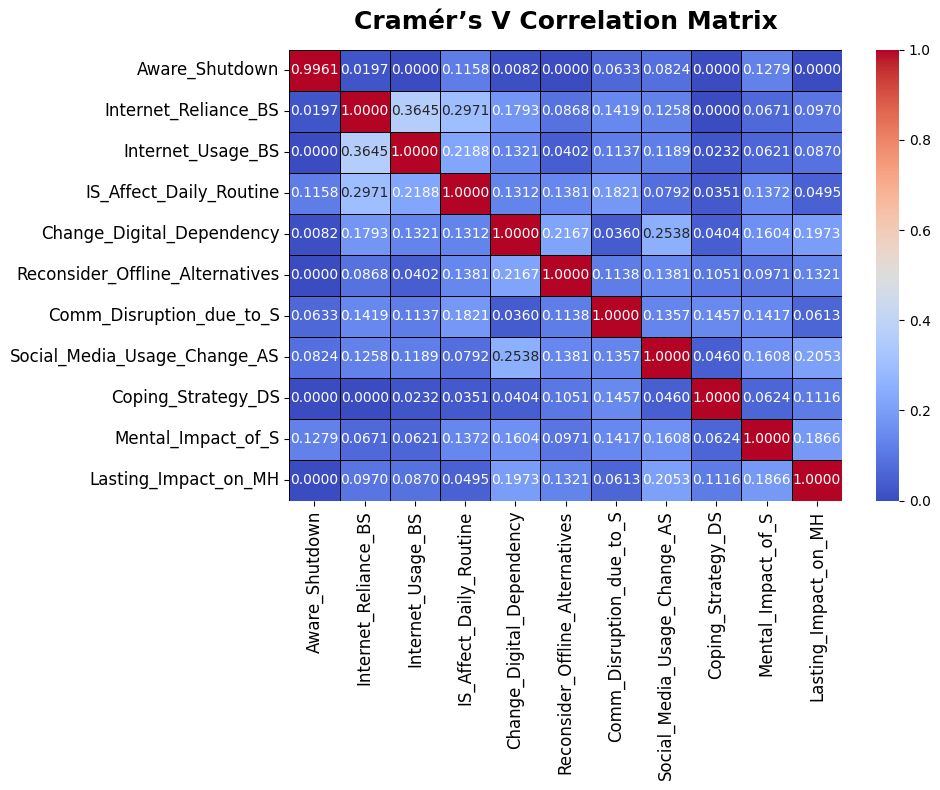

In [12]:
# Define variables for the correlation matrix (dependent + independent)

variables = [
    'Aware_Shutdown',
    'Internet_Reliance_BS', 
    'Internet_Usage_BS', 
    'IS_Affect_Daily_Routine',
    'Change_Digital_Dependency', 
    'Reconsider_Offline_Alternatives', 
    'Comm_Disruption_due_to_S', 
    'Social_Media_Usage_Change_AS',
    'Coping_Strategy_DS',
    'Mental_Impact_of_S',
    'Lasting_Impact_on_MH'
]

# Function to compute Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute correlation matrix
cramers_v_matrix = pd.DataFrame(np.zeros((len(variables), len(variables))),
                                index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        cramers_v_matrix.loc[var1, var2] = round(cramers_v(df_hy2[var1], df_hy2[var2]), 4)

# Plot the heatmap clearly
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5, linecolor='black')

# Add clear titles and labels
plt.title("Cramér’s V Correlation Matrix", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the figure clearly
# plt.savefig('Cramers_V_Correlation_Matrix.png', dpi=300, bbox_inches='tight')

plt.show()

###### 4.1.5: Validate Statistical Robustness (Bonferroni Correction)

In [13]:
# Bonferroni correction for Chi-square results
chi_square_results_df_corrected['Bonferroni_Significance'] = chi_square_results_df_corrected['P-value'].apply(
    lambda p: 'Significant ✅' if p < (0.05 / len(chi_square_results_df_corrected)) else 'Not Significant ❌'
)

# Display updated results clearly
print("\nChi-square Test Summary Table (with Bonferroni Correction):")
print(chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance', 'Bonferroni_Significance']])



Chi-square Test Summary Table (with Bonferroni Correction):
      Dependent Variable             Independent Variable  P-value       Significance Bonferroni_Significance
0     Mental_Impact_of_S                   Aware_Shutdown   0.0000      Significant ✅           Significant ✅
1     Mental_Impact_of_S             Internet_Reliance_BS   0.0080      Significant ✅       Not Significant ❌
2     Mental_Impact_of_S                Internet_Usage_BS   0.0151      Significant ✅       Not Significant ❌
3     Mental_Impact_of_S          IS_Affect_Daily_Routine   0.0000      Significant ✅           Significant ✅
4     Mental_Impact_of_S        Change_Digital_Dependency   0.0000      Significant ✅           Significant ✅
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives   0.0000      Significant ✅           Significant ✅
6     Mental_Impact_of_S         Comm_Disruption_due_to_S   0.0000      Significant ✅           Significant ✅
7     Mental_Impact_of_S     Social_Media_Usage_Change_AS  

###### 4.1.6: Effect Size Interpretation (Cramér’s V)

In [14]:
# Define effect size interpretation thresholds for Cramér’s V
def interpret_cramers_v(value):
    if value < 0.1:
        return "Negligible 🔹"
    elif value < 0.2:
        return "Weak ⚠️"
    elif value < 0.4:
        return "Moderate ✅"
    else:
        return "Strong 🔥"

# Apply interpretation to Cramér’s V values
chi_square_results_df_corrected['Effect Size Interpretation'] = chi_square_results_df_corrected[
    'Effect Size (Bias-Corrected Cramér’s V)'].apply(interpret_cramers_v)

# Display updated results with effect size interpretations
print("Effect Size Interpretation (Cramér’s V)")
print(chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'Effect Size (Bias-Corrected Cramér’s V)', 'Effect Size Interpretation']])

Effect Size Interpretation (Cramér’s V)
      Dependent Variable             Independent Variable  Effect Size (Bias-Corrected Cramér’s V) Effect Size Interpretation
0     Mental_Impact_of_S                   Aware_Shutdown                                   0.1279                    Weak ⚠️
1     Mental_Impact_of_S             Internet_Reliance_BS                                   0.0671               Negligible 🔹
2     Mental_Impact_of_S                Internet_Usage_BS                                   0.0621               Negligible 🔹
3     Mental_Impact_of_S          IS_Affect_Daily_Routine                                   0.1372                    Weak ⚠️
4     Mental_Impact_of_S        Change_Digital_Dependency                                   0.1604                    Weak ⚠️
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives                                   0.0971               Negligible 🔹
6     Mental_Impact_of_S         Comm_Disruption_due_to_S                     

4.2: Ordinal Logistic Regression Models

###### 4.2.1: Fit Ordinal Logistic Regression Model

In [15]:
# Create a new DataFrame containing both independent and dependent variables related to Hypothesis 1
df_hy2_selected = df_hy2[[
    'Aware_Shutdown',
    'Internet_Reliance_BS', 
    'Internet_Usage_BS', 
    'IS_Affect_Daily_Routine',
    'Change_Digital_Dependency', 
    'Reconsider_Offline_Alternatives', 
    'Comm_Disruption_due_to_S', 
    'Social_Media_Usage_Change_AS',
    'Coping_Strategy_DS',
    'Mental_Impact_of_S',
    'Lasting_Impact_on_MH'
]]

In [16]:
# Display distinct values for each feature in df_hy1_selected
distinct_values = {col: df_hy2_selected[col].unique().tolist() for col in df_hy2_selected.columns}

# Print the distinct values for each column
for col, values in distinct_values.items():
    print(f"{col}: {values}")

Aware_Shutdown: ['Yes', 'No']
Internet_Reliance_BS: ['A little', 'Moderately', 'Extremely', 'Not at all']
Internet_Usage_BS: ['2-4 hours', '>6 hours', '4-6 hours', '<2 hours']
IS_Affect_Daily_Routine: ['No', 'Yes', 'Somewhat']
Change_Digital_Dependency: ['No change', 'Increased somewhat', 'Increased significantly', 'Decreased somewhat', 'Decreased significantly']
Reconsider_Offline_Alternatives: ['No', 'Somewhat', 'Yes']
Comm_Disruption_due_to_S: ['No disruption', 'Severely disrupted', 'Somewhat disrupted']
Social_Media_Usage_Change_AS: ['Stayed the same', 'Decreased somewhat', 'Increased significantly', 'Stopped completely', 'Increased somewhat']
Coping_Strategy_DS: ['None of the above', 'Increased time with family or friends in person', 'Turned to other digital platforms', 'Focused on offline activities', 'Experienced difficulty coping']
Mental_Impact_of_S: ['No Impact', 'Negative Impact', 'Positive Impact']
Lasting_Impact_on_MH: ['No lasting impact', 'Moderate lasting impact', 'Sign

In [17]:
ordinal_mappings = {
    "Aware_Shutdown": {"No": 0, "Yes": 1},
    "Internet_Reliance_BS": {"Not at all": 0, "A little": 1, "Moderately": 2, "Extremely": 3},
    "Internet_Usage_BS": {"<2 hours": 0, "2-4 hours": 1, "4-6 hours": 2, ">6 hours": 3},
    "IS_Affect_Daily_Routine": {"No": 0, "Somewhat": 1, "Yes": 2},
    "Change_Digital_Dependency": {"Decreased significantly": 0, "Decreased somewhat": 1, "No change": 2, 
                                  "Increased somewhat": 3, "Increased significantly": 4},
    "Reconsider_Offline_Alternatives": {"No": 0, "Somewhat": 1, "Yes": 2},
    "Comm_Disruption_due_to_S": {"No disruption": 0, "Somewhat disrupted": 1, "Severely disrupted": 2},
    "Social_Media_Usage_Change_AS": {"Stopped completely": 0, "Decreased somewhat": 1, "Stayed the same": 2, 
                                     "Increased somewhat": 3, "Increased significantly": 4},
    "Coping_Strategy_DS": {"None of the above": 0, "Experienced difficulty coping": 1, 
                           "Turned to other digital platforms": 2, "Increased time with family or friends in person": 3, 
                           "Focused on offline activities": 4},
    "Mental_Impact_of_S": {"Negative Impact": 0, "No Impact": 1, "Positive Impact": 2},
    "Lasting_Impact_on_MH": {"No lasting impact": 0, "Moderate lasting impact": 1, "Significant lasting impact": 2},
}


In [18]:
# Create a copy of the dataset
df_hy2_encoded = df_hy2_selected.copy()

# Apply the encoding
for col, mapping in ordinal_mappings.items():
    df_hy2_encoded[col] = df_hy2_encoded[col].map(mapping)

In [19]:
# Check for missing values after encoding
missing_values = df_hy2_encoded.isnull().sum()

print("\nMissing Values:\n", missing_values) # Show the mapping and missing values


Missing Values:
 Aware_Shutdown                     0
Internet_Reliance_BS               0
Internet_Usage_BS                  0
IS_Affect_Daily_Routine            0
Change_Digital_Dependency          0
Reconsider_Offline_Alternatives    0
Comm_Disruption_due_to_S           0
Social_Media_Usage_Change_AS       0
Coping_Strategy_DS                 0
Mental_Impact_of_S                 0
Lasting_Impact_on_MH               0
dtype: int64


In [20]:
# Display the processed dataset and the mapping
print("Preprocessed Dataset:\n", df_hy2_encoded.head())

Preprocessed Dataset:
    Aware_Shutdown  Internet_Reliance_BS  Internet_Usage_BS  IS_Affect_Daily_Routine  Change_Digital_Dependency  Reconsider_Offline_Alternatives  Comm_Disruption_due_to_S  Social_Media_Usage_Change_AS  Coping_Strategy_DS  Mental_Impact_of_S  Lasting_Impact_on_MH
0               1                     1                  1                        0                          2                                0                         0                             2                   0                   1                     0
1               0                     2                  3                        2                          2                                1                         2                             1                   3                   1                     0
2               0                     2                  3                        2                          2                                1                         2                      

In [21]:
print("\nOrdinal Mappings:\n", ordinal_mappings)


Ordinal Mappings:
 {'Aware_Shutdown': {'No': 0, 'Yes': 1}, 'Internet_Reliance_BS': {'Not at all': 0, 'A little': 1, 'Moderately': 2, 'Extremely': 3}, 'Internet_Usage_BS': {'<2 hours': 0, '2-4 hours': 1, '4-6 hours': 2, '>6 hours': 3}, 'IS_Affect_Daily_Routine': {'No': 0, 'Somewhat': 1, 'Yes': 2}, 'Change_Digital_Dependency': {'Decreased significantly': 0, 'Decreased somewhat': 1, 'No change': 2, 'Increased somewhat': 3, 'Increased significantly': 4}, 'Reconsider_Offline_Alternatives': {'No': 0, 'Somewhat': 1, 'Yes': 2}, 'Comm_Disruption_due_to_S': {'No disruption': 0, 'Somewhat disrupted': 1, 'Severely disrupted': 2}, 'Social_Media_Usage_Change_AS': {'Stopped completely': 0, 'Decreased somewhat': 1, 'Stayed the same': 2, 'Increased somewhat': 3, 'Increased significantly': 4}, 'Coping_Strategy_DS': {'None of the above': 0, 'Experienced difficulty coping': 1, 'Turned to other digital platforms': 2, 'Increased time with family or friends in person': 3, 'Focused on offline activities': 4}

###### 4.2.2: Interpret Results & Identify Significant Predictors

In [22]:
# Define independent and dependent variables
IVs = ["Aware_Shutdown","Internet_Reliance_BS", "Internet_Usage_BS", "IS_Affect_Daily_Routine",
       "Change_Digital_Dependency", "Reconsider_Offline_Alternatives","Comm_Disruption_due_to_S",
       "Social_Media_Usage_Change_AS", "Coping_Strategy_DS"]
DVs = ["Mental_Impact_of_S", "Lasting_Impact_on_MH"]

# Initialize dictionary to store significant predictors
significant_predictors = {}

# Loop through each DV and fit a separate ordinal logistic regression model
i = 1
for DV in DVs:
    print(f"\n=== {i}. Ordinal Logistic Regression for {DV} ===")
    
    # Convert dependent variable to categorical ordinal
    df_hy2_encoded[DV] = df_hy2_encoded[DV].astype("category")

    # Build the model
    model = OrderedModel(df_hy2_encoded[DV], df_hy2_encoded[IVs], distr="logit")
    
    # Fit the model
    result = model.fit()
    
    # Print the summary
    print(result.summary())

    # Extract significant predictors (p-value < 0.05)
    significant_vars = result.pvalues[result.pvalues < 0.05].index.tolist()
    significant_predictors[DV] = significant_vars
    
    i += 1

# Display significant predictors
print("\n=== Significant Predictors per Dependent Variable ===")
for dv, predictors in significant_predictors.items():
    print(f"   - {dv}: {predictors if predictors else 'No significant predictors'}")



=== 1. Ordinal Logistic Regression for Mental_Impact_of_S ===


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             OrderedModel Results                             
Dep. Variable:     Mental_Impact_of_S   Log-Likelihood:                -1191.5
Model:                   OrderedModel   AIC:                             2405.
Method:            Maximum Likelihood   BIC:                             2461.
Date:                Wed, 02 Jul 2025                                         
Time:                        07:39:50                                         
No. Observations:                1267                                         
Df Residuals:                    1256                                         
Df Model:                           9                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Aware_Shutdown                      0.1145      0.178      0.643      0.521      -0.235  

c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###### 4.2.3: Calculate McFadden’s Pseudo R² (Measure Model Fit)

In [23]:
# Ensure pseudo_r2_values list exists
pseudo_r2_results = []

for DV in DVs:
    print(f"\n🔹 Calculating McFadden’s Pseudo R² for {DV}")

    try:
        # Build the model
        model = OrderedModel(df_hy2_encoded[DV], df_hy2_encoded[IVs], distr="logit")
        result = model.fit(disp=False)

        # Extract log-likelihood values
        null_log_likelihood = result.llnull  # Null model log-likelihood
        model_log_likelihood = result.llf    # Fitted model log-likelihood

        # Compute McFadden’s Pseudo R²
        pseudo_r2 = 1 - (model_log_likelihood / null_log_likelihood)

        # Store results
        pseudo_r2_results.append({
            "Dependent Variable": DV,
            "McFadden’s Pseudo R²": round(pseudo_r2, 4),
            "Interpretation": "Weak Model Fit ⚠️" if pseudo_r2 < 0.2 else 
                              "Moderate Model Fit ✅" if pseudo_r2 < 0.4 else 
                              "Strong Model Fit 🔥"
        })
    
    except Exception as e:
        print(f"⚠️ Error calculating Pseudo R² for {DV}: {e}")
        pseudo_r2_results.append({
            "Dependent Variable": DV,
            "McFadden’s Pseudo R²": "Error",
            "Interpretation": "N/A"
        })

# Convert results into a DataFrame
pseudo_r2_df = pd.DataFrame(pseudo_r2_results)

# Display McFadden’s Pseudo R² values
print(pseudo_r2_df)



🔹 Calculating McFadden’s Pseudo R² for Mental_Impact_of_S


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



🔹 Calculating McFadden’s Pseudo R² for Lasting_Impact_on_MH
     Dependent Variable  McFadden’s Pseudo R²     Interpretation
0    Mental_Impact_of_S                0.0173  Weak Model Fit ⚠️
1  Lasting_Impact_on_MH                0.0309  Weak Model Fit ⚠️


c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


###### 4.2.4: Effect Size Interpretation

In [24]:
effect_sizes = {}

for DV in DVs:
    model = OrderedModel(df_hy2_encoded[DV], df_hy2_encoded[IVs], distr="logit")
    result = model.fit()
    coefs = result.params
    effect_sizes[DV] = coefs

    print(f"\nEffect Size Interpretation for {DV}:\n")
    for var, coef in coefs.items():
        direction = "Positive 📈" if coef > 0 else "Negative 📉"
        strength = "Strong 🔥" if abs(coef) > 1 else "Moderate ✅" if abs(coef) > 0.5 else "Weak ⚠️"
        print(f"{var}: {coef:.4f} ({direction}, {strength})")

# Final Output
print("\nOrdinal Logistic Regression Analysis Completed Successfully 🚀")

c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Effect Size Interpretation for Mental_Impact_of_S:

Aware_Shutdown: 0.1145 (Positive 📈, Weak ⚠️)
Internet_Reliance_BS: -0.0644 (Negative 📉, Weak ⚠️)
Internet_Usage_BS: 0.1168 (Positive 📈, Weak ⚠️)
IS_Affect_Daily_Routine: -0.1116 (Negative 📉, Weak ⚠️)
Change_Digital_Dependency: 0.0854 (Positive 📈, Weak ⚠️)
Reconsider_Offline_Alternatives: -0.0241 (Negative 📉, Weak ⚠️)
Comm_Disruption_due_to_S: -0.2448 (Negative 📉, Weak ⚠️)
Social_Media_Usage_Change_AS: -0.1640 (Negative 📉, Weak ⚠️)
Coping_Strategy_DS: -0.1758 (Negative 📉, Weak ⚠️)
0/1: -0.6887 (Negative 📉, Moderate ✅)
1/2: 0.3652 (Positive 📈, Weak ⚠️)

Effect Size Interpretation for Lasting_Impact_on_MH:

Aware_Shutdown: -0.1071 (Negative 📉, Weak ⚠️)
Internet_Reliance_BS: -0.0523 (Negative 📉, Weak ⚠️)
Internet_Usage_BS: -0.1489 (Negative 📉, Weak ⚠️)
IS_Affect_Daily_Routine: 0.1471 (Positive 📈, Weak ⚠️)
Change_Digital_Dependency: 0.1230 (Positive 📈, Weak ⚠️)
Reconsider_Offline_Alternatives: -0.0364 (Negative 📉, Weak ⚠️)
Comm_Disruption

c:\Users\Shakhawat\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4.3: Kruskal-Wallis Test for IV-DV Relationships

###### 4.3.1: Run Kruskal-Wallis Test for Each IV-DV Pair

In [25]:
# Define independent and dependent variables
IVs = ["Aware_Shutdown","Internet_Reliance_BS", "Internet_Usage_BS", "IS_Affect_Daily_Routine",
       "Change_Digital_Dependency", "Reconsider_Offline_Alternatives","Comm_Disruption_due_to_S",
       "Social_Media_Usage_Change_AS", "Coping_Strategy_DS"]
DVs = ["Mental_Impact_of_S", "Lasting_Impact_on_MH"]

# Initialize dictionary to store p-values
kruskal_results = []

for DV in DVs:
    for IV in IVs:
        groups = [df_hy2_encoded[DV][df_hy2_encoded[IV] == category] for category in df_hy2_encoded[IV].unique()]
        stat, p_value = kruskal(*groups)

        kruskal_results.append({
            "Dependent Variable": DV,
            "Independent Variable": IV,
            "Test Statistic": round(stat, 4),
            "P-value": round(p_value, 4),
            "Significance": "Significant ✅" if p_value < 0.05 else "Not Significant ❌"
        })

# Display results
kruskal_results_df = pd.DataFrame(kruskal_results)
print(kruskal_results_df)

      Dependent Variable             Independent Variable  Test Statistic  P-value       Significance
0     Mental_Impact_of_S                   Aware_Shutdown         21.4141   0.0000      Significant ✅
1     Mental_Impact_of_S             Internet_Reliance_BS         16.4172   0.0009      Significant ✅
2     Mental_Impact_of_S                Internet_Usage_BS          2.8175   0.4206  Not Significant ❌
3     Mental_Impact_of_S          IS_Affect_Daily_Routine         27.6503   0.0000      Significant ✅
4     Mental_Impact_of_S        Change_Digital_Dependency         14.4831   0.0059      Significant ✅
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives         15.0854   0.0005      Significant ✅
6     Mental_Impact_of_S         Comm_Disruption_due_to_S         35.7962   0.0000      Significant ✅
7     Mental_Impact_of_S     Social_Media_Usage_Change_AS         30.2018   0.0000      Significant ✅
8     Mental_Impact_of_S               Coping_Strategy_DS          6.3837   0.1723

###### 4.3.2: Interpret Results (Which IVs Significantly Affect DVs?)

In [26]:
for index, row in kruskal_results_df.iterrows():
    print(f"\nKruskal-Wallis Test for {row['Independent Variable']} vs {row['Dependent Variable']}:")
    print(f"Test Statistic: {row['Test Statistic']}, P-value: {row['P-value']}")

    # Decision
    if row["P-value"] < 0.05:
        print(f"Reject H₀: {row['Independent Variable']} significantly affects {row['Dependent Variable']} ✅")
    else:
        print(f"Fail to reject H₀: No significant difference in {row['Dependent Variable']} based on {row['Independent Variable']} ❌")


Kruskal-Wallis Test for Aware_Shutdown vs Mental_Impact_of_S:
Test Statistic: 21.4141, P-value: 0.0
Reject H₀: Aware_Shutdown significantly affects Mental_Impact_of_S ✅

Kruskal-Wallis Test for Internet_Reliance_BS vs Mental_Impact_of_S:
Test Statistic: 16.4172, P-value: 0.0009
Reject H₀: Internet_Reliance_BS significantly affects Mental_Impact_of_S ✅

Kruskal-Wallis Test for Internet_Usage_BS vs Mental_Impact_of_S:
Test Statistic: 2.8175, P-value: 0.4206
Fail to reject H₀: No significant difference in Mental_Impact_of_S based on Internet_Usage_BS ❌

Kruskal-Wallis Test for IS_Affect_Daily_Routine vs Mental_Impact_of_S:
Test Statistic: 27.6503, P-value: 0.0
Reject H₀: IS_Affect_Daily_Routine significantly affects Mental_Impact_of_S ✅

Kruskal-Wallis Test for Change_Digital_Dependency vs Mental_Impact_of_S:
Test Statistic: 14.4831, P-value: 0.0059
Reject H₀: Change_Digital_Dependency significantly affects Mental_Impact_of_S ✅

Kruskal-Wallis Test for Reconsider_Offline_Alternatives vs 

###### 4.3.3: Compute Effect Size (Eta-Squared or Epsilon-Squared)

In [27]:
effect_size_results = []

for DV in DVs:
    for IV in IVs:
        groups = [df_hy2_encoded[DV][df_hy2_encoded[IV] == category] for category in df_hy2_encoded[IV].unique()]
        stat, p_value = kruskal(*groups)

        # Compute Eta-Squared (η²) = (H - k + 1) / (n - k)
        k = len(groups)  # Number of groups
        n = len(df_hy2_encoded[DV])  # Total sample size
        eta_squared = (stat - (k - 1)) / (n - k)

        # Compute Epsilon-Squared (ε²) = H / (N - 1)
        epsilon_squared = stat / (n - 1)

        effect_size_results.append({
            "Dependent Variable": DV,
            "Independent Variable": IV,
            "Eta-Squared (η²)": round(eta_squared, 4),
            "Epsilon-Squared (ε²)": round(epsilon_squared, 4),
            "Effect Size Interpretation": 
                "Small 🔹" if eta_squared < 0.01 else
                "Medium ✅" if eta_squared < 0.06 else
                "Large 🔥"
        })

# Display effect size results
effect_size_results_df = pd.DataFrame(effect_size_results)
print("Effect Size (Eta-Squared & Epsilon-Squared)")
print(effect_size_results_df)

Effect Size (Eta-Squared & Epsilon-Squared)
      Dependent Variable             Independent Variable  Eta-Squared (η²)  Epsilon-Squared (ε²) Effect Size Interpretation
0     Mental_Impact_of_S                   Aware_Shutdown            0.0161                0.0169                   Medium ✅
1     Mental_Impact_of_S             Internet_Reliance_BS            0.0106                0.0130                   Medium ✅
2     Mental_Impact_of_S                Internet_Usage_BS           -0.0001                0.0022                    Small 🔹
3     Mental_Impact_of_S          IS_Affect_Daily_Routine            0.0203                0.0218                   Medium ✅
4     Mental_Impact_of_S        Change_Digital_Dependency            0.0083                0.0114                    Small 🔹
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives            0.0104                0.0119                   Medium ✅
6     Mental_Impact_of_S         Comm_Disruption_due_to_S            0.0267      

###### 4.3.4: Boxplot & Violin Plot for Kruskal-Wallis Results

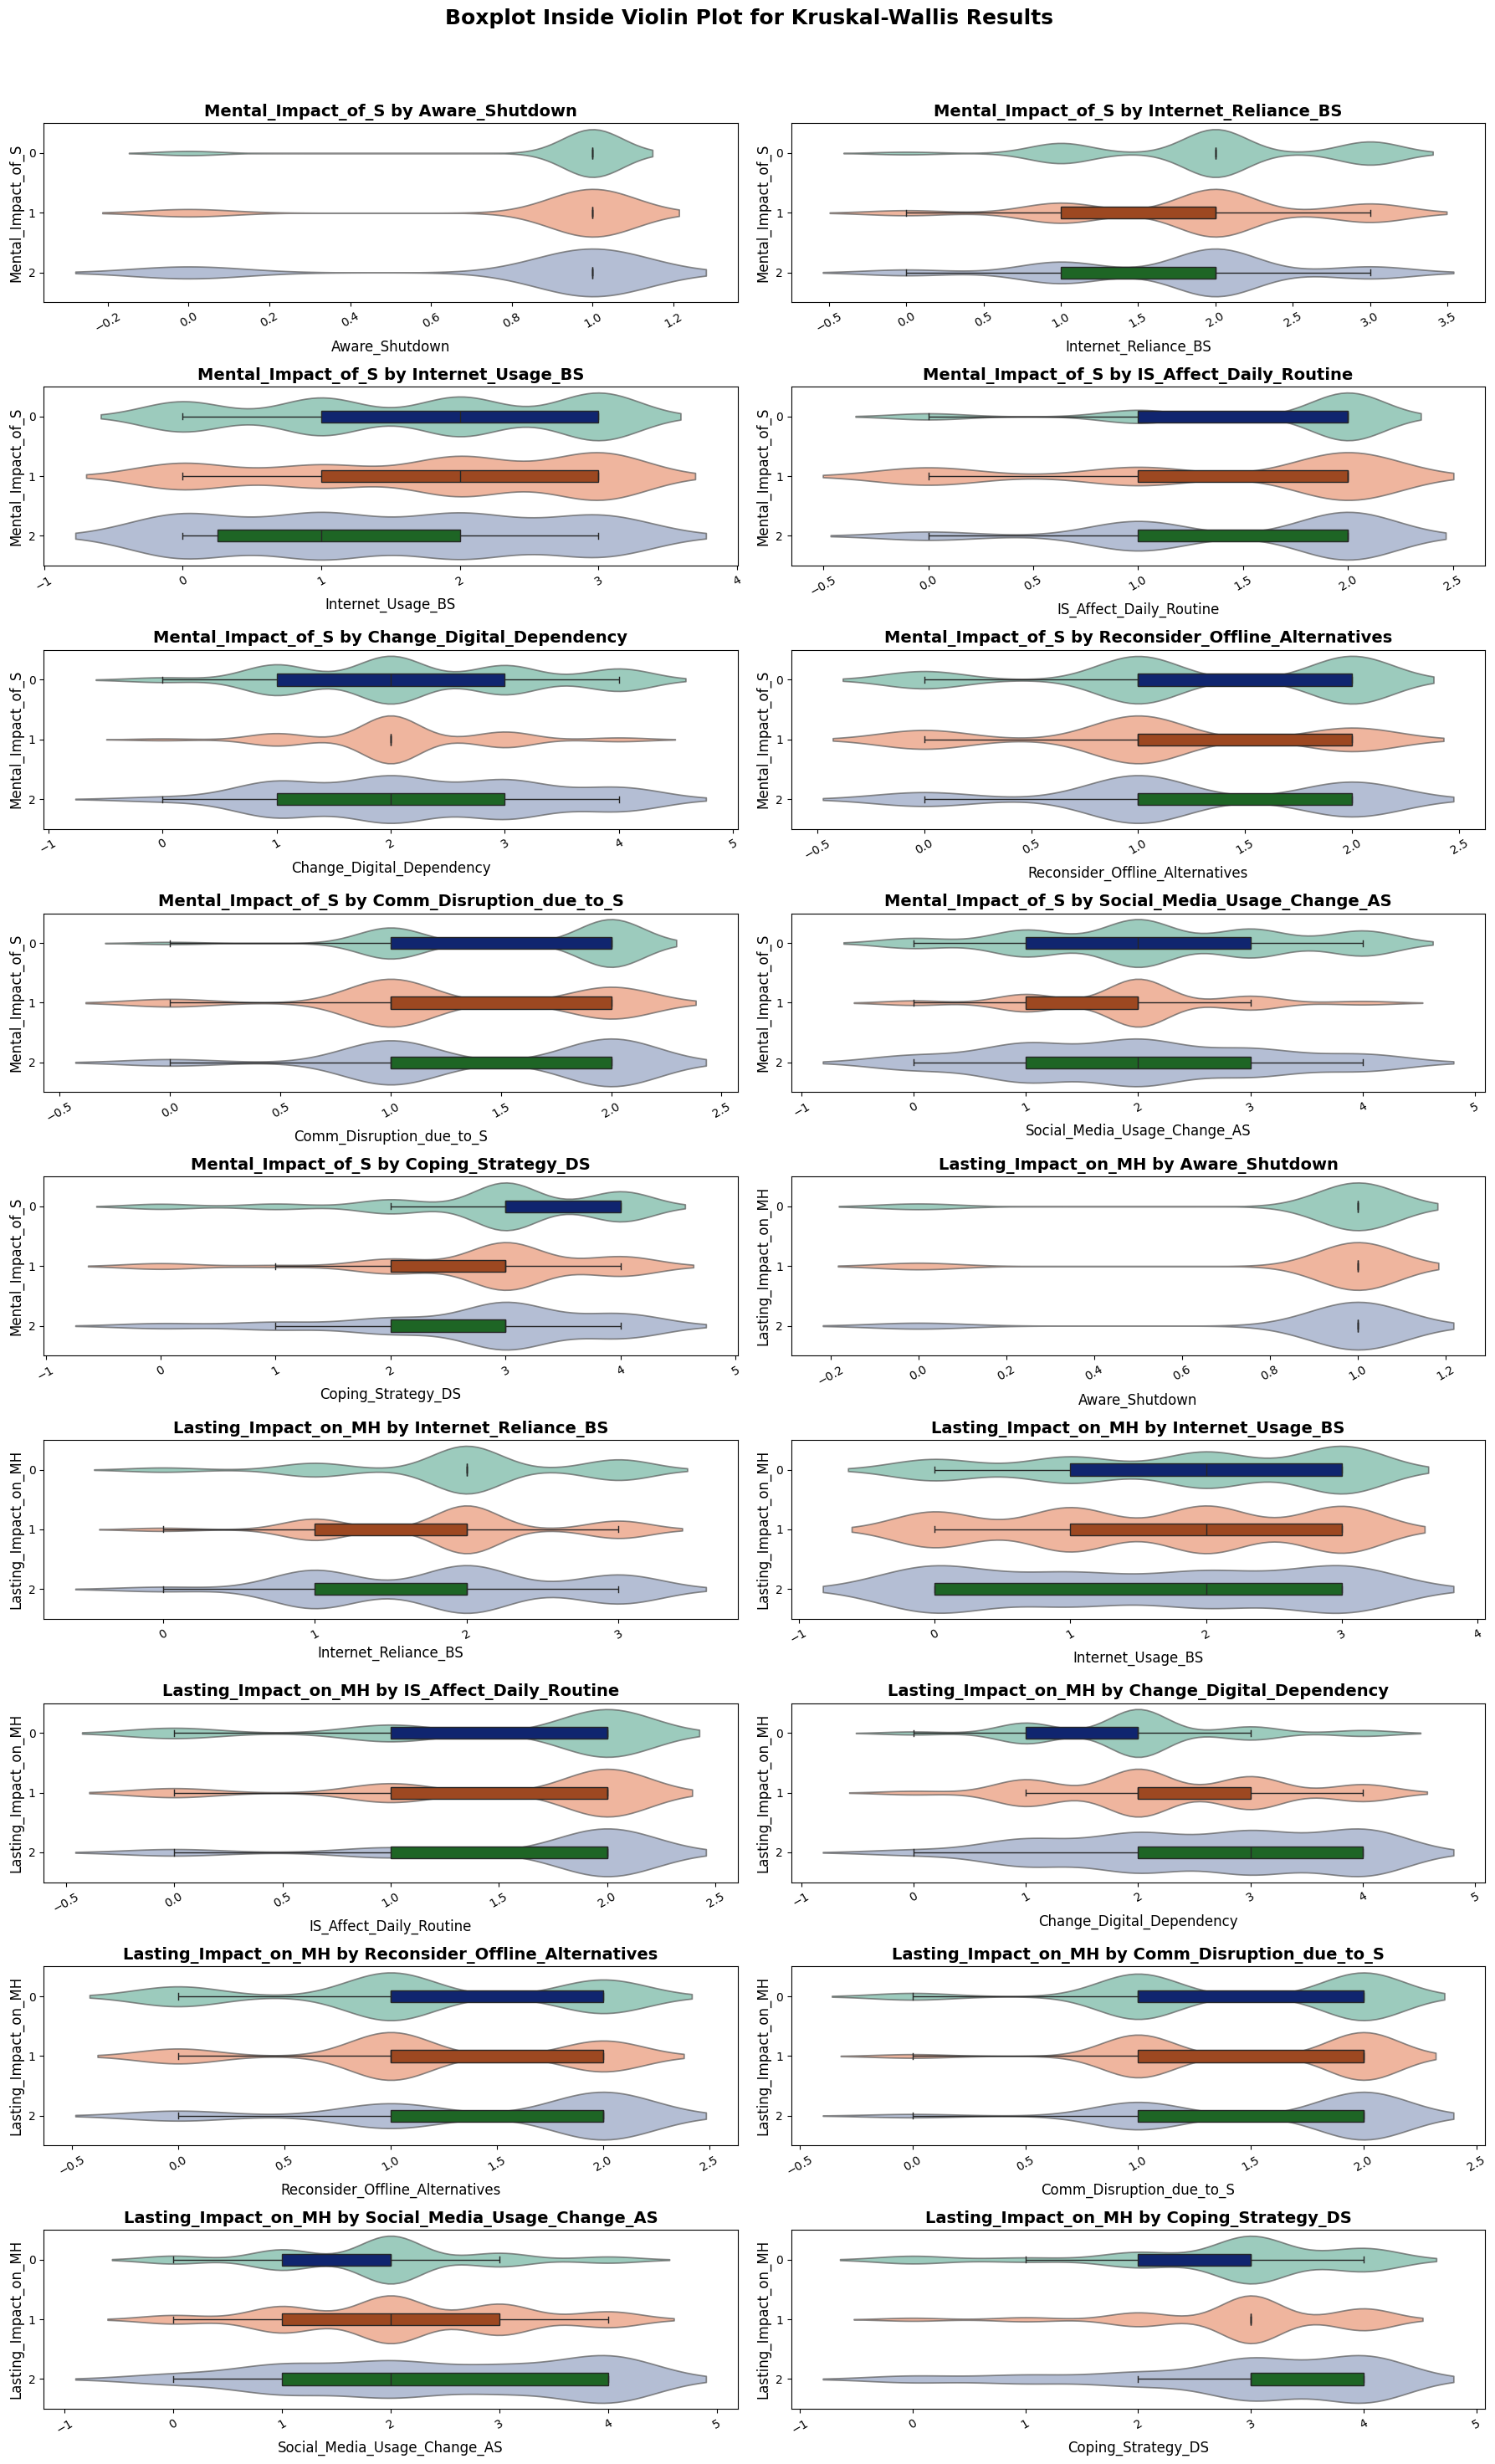

In [28]:
# Set up the figure for multiple plots (6 rows, 2 columns)
fig, axes = plt.subplots(9, 2, figsize=(18, 30))
fig.suptitle("Boxplot Inside Violin Plot for Kruskal-Wallis Results", fontsize=18, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define all IV-DV pairs for plotting
variable_pairs = [(DV, IV) for DV in DVs for IV in IVs]

# Ensure we have exactly 12 plots (6 rows * 2 columns)
for idx, (DV, IV) in enumerate(variable_pairs[:18]):  # Limit to first 12 pairs
    ax = axes[idx]

    # Create violin plot (distribution shape)
    sns.violinplot(x=df_hy2_encoded[IV], y=df_hy2_encoded[DV], inner=None, ax=ax, palette="Set2", alpha=0.7)

    # Add box plot inside the violin plot
    sns.boxplot(x=df_hy2_encoded[IV], y=df_hy2_encoded[DV], ax=ax, width=0.2, palette="dark", showfliers=False)

    ax.set_title(f"{DV} by {IV}", fontsize=14, fontweight="bold")
    ax.set_xlabel(IV, fontsize=12)
    ax.set_ylabel(DV, fontsize=12)
    ax.tick_params(axis='x', rotation=30)

# Hide any unused subplots if there are fewer than 12 pairs
for idx in range(len(variable_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

4.4: Final Interpretation & Hypothesis Conclusion

###### 4.4.1: Summarize Statistical Findings

In [29]:
# 1️⃣ **Chi-Square Test Findings (Association between IVs & DVs)**
print("\n📌 **Chi-Square Test Results:** (Testing Association Between Variables)")
chi_summary = chi_square_results_df_corrected[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance', 'Effect Size Interpretation']]
print(chi_summary)


📌 **Chi-Square Test Results:** (Testing Association Between Variables)
      Dependent Variable             Independent Variable  P-value       Significance Effect Size Interpretation
0     Mental_Impact_of_S                   Aware_Shutdown   0.0000      Significant ✅                    Weak ⚠️
1     Mental_Impact_of_S             Internet_Reliance_BS   0.0080      Significant ✅               Negligible 🔹
2     Mental_Impact_of_S                Internet_Usage_BS   0.0151      Significant ✅               Negligible 🔹
3     Mental_Impact_of_S          IS_Affect_Daily_Routine   0.0000      Significant ✅                    Weak ⚠️
4     Mental_Impact_of_S        Change_Digital_Dependency   0.0000      Significant ✅                    Weak ⚠️
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives   0.0000      Significant ✅               Negligible 🔹
6     Mental_Impact_of_S         Comm_Disruption_due_to_S   0.0000      Significant ✅                    Weak ⚠️
7     Mental_Impact_of_S

In [30]:
# 2️⃣ **Ordinal Logistic Regression Results (Predictive Strength & Significant Variables)**
print("\n📌 **Ordinal Logistic Regression Results:** (Predicting Impact of IVs on DVs)")
print("\n🔹 **Significant Predictors per Dependent Variable:**")
if significant_predictors:
    for dv, predictors in significant_predictors.items():
        print(f"   - {dv}: {predictors if predictors else 'No significant predictors'}")
else:
    print("   No significant predictors found.")


📌 **Ordinal Logistic Regression Results:** (Predicting Impact of IVs on DVs)

🔹 **Significant Predictors per Dependent Variable:**
   - Mental_Impact_of_S: ['Comm_Disruption_due_to_S', 'Social_Media_Usage_Change_AS', 'Coping_Strategy_DS', '0/1', '1/2']
   - Lasting_Impact_on_MH: ['Internet_Usage_BS', 'Change_Digital_Dependency', 'Social_Media_Usage_Change_AS', 'Coping_Strategy_DS', '1/2']


In [31]:
# 3️⃣ **Kruskal-Wallis Test Findings (Group-wise Differences)**
print("\n📌 **Kruskal-Wallis Test Results:** (Testing Whether Different Groups Show Statistical Differences)")
kruskal_summary = kruskal_results_df[['Dependent Variable', 'Independent Variable', 'P-value', 'Significance']]
print(kruskal_summary)


📌 **Kruskal-Wallis Test Results:** (Testing Whether Different Groups Show Statistical Differences)
      Dependent Variable             Independent Variable  P-value       Significance
0     Mental_Impact_of_S                   Aware_Shutdown   0.0000      Significant ✅
1     Mental_Impact_of_S             Internet_Reliance_BS   0.0009      Significant ✅
2     Mental_Impact_of_S                Internet_Usage_BS   0.4206  Not Significant ❌
3     Mental_Impact_of_S          IS_Affect_Daily_Routine   0.0000      Significant ✅
4     Mental_Impact_of_S        Change_Digital_Dependency   0.0059      Significant ✅
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives   0.0005      Significant ✅
6     Mental_Impact_of_S         Comm_Disruption_due_to_S   0.0000      Significant ✅
7     Mental_Impact_of_S     Social_Media_Usage_Change_AS   0.0000      Significant ✅
8     Mental_Impact_of_S               Coping_Strategy_DS   0.1723  Not Significant ❌
9   Lasting_Impact_on_MH                

In [32]:
# 4️⃣ **Effect Size Analysis (Chi-Square & Kruskal-Wallis)**
print("\n📌 **Effect Size Results (Chi-Square & Kruskal-Wallis):**")
effect_size_summary = effect_size_results_df[['Dependent Variable', 'Independent Variable', 'Eta-Squared (η²)', 'Epsilon-Squared (ε²)', 'Effect Size Interpretation']]
print(effect_size_summary)


📌 **Effect Size Results (Chi-Square & Kruskal-Wallis):**
      Dependent Variable             Independent Variable  Eta-Squared (η²)  Epsilon-Squared (ε²) Effect Size Interpretation
0     Mental_Impact_of_S                   Aware_Shutdown            0.0161                0.0169                   Medium ✅
1     Mental_Impact_of_S             Internet_Reliance_BS            0.0106                0.0130                   Medium ✅
2     Mental_Impact_of_S                Internet_Usage_BS           -0.0001                0.0022                    Small 🔹
3     Mental_Impact_of_S          IS_Affect_Daily_Routine            0.0203                0.0218                   Medium ✅
4     Mental_Impact_of_S        Change_Digital_Dependency            0.0083                0.0114                    Small 🔹
5     Mental_Impact_of_S  Reconsider_Offline_Alternatives            0.0104                0.0119                   Medium ✅
6     Mental_Impact_of_S         Comm_Disruption_due_to_S          

In [33]:
# 5️⃣ **McFadden’s Pseudo R² (Ordinal Logistic Regression)**
print("\n📌 **Model Fit: McFadden’s Pseudo R² for Ordinal Logistic Regression:**")

# Ensure pseudo_r2_df exists before trying to access it
if 'pseudo_r2_df' in globals() and not pseudo_r2_df.empty:
    for index, row in pseudo_r2_df.iterrows():
        print(f"   - {row['Dependent Variable']}: McFadden’s R² = {row['McFadden’s Pseudo R²']} "
              f"({row['Interpretation']})")
else:
    print("   McFadden’s Pseudo R² values are missing. Re-run Step 3.2.3 if needed.")



📌 **Model Fit: McFadden’s Pseudo R² for Ordinal Logistic Regression:**
   - Mental_Impact_of_S: McFadden’s R² = 0.0173 (Weak Model Fit ⚠️)
   - Lasting_Impact_on_MH: McFadden’s R² = 0.0309 (Weak Model Fit ⚠️)


###### 4.4.2: State if Hypothesis 2 is Accepted or Rejected

In [34]:
  

# Define hypothesis statements
null_hypothesis = "Prolonged and repeated internet shutdowns have no significant impact on individuals' psychological well-being or mental distress."
alternative_hypothesis = "Prolonged and repeated internet shutdowns lead to increased mental distress, negatively impacting individuals' psychological well-being."

# Collect significant results from all tests

# 1️⃣ Chi-Square Test Results
significant_chi = set(chi_square_results_df_corrected[chi_square_results_df_corrected['Significance'] == 'Significant ✅']['Dependent Variable'])

# 2️⃣ Kruskal-Wallis Test Results
significant_kruskal = set(kruskal_results_df[kruskal_results_df['Significance'] == 'Significant ✅']['Dependent Variable'])

# 3️⃣ Ordinal Logistic Regression (Significant Predictors)
significant_ordinal = set([dv for dv, predictors in significant_predictors.items() if predictors])

# 4️⃣ Effect Size Interpretation (Cramér’s V, Eta-Squared, Epsilon-Squared)
strong_effect_size = set(effect_size_results_df[effect_size_results_df['Effect Size Interpretation'].isin(['Moderate ✅', 'Large 🔥'])]['Dependent Variable'])

# 5️⃣ McFadden’s Pseudo R² (Check for good model fit)
strong_model_fit = set(pseudo_r2_df[pseudo_r2_df['Interpretation'].isin(['Moderate Model Fit ✅', 'Strong Model Fit 🔥'])]['Dependent Variable'])

# Combine all significant findings
significant_iv_dv_pairs = significant_chi | significant_kruskal | significant_ordinal | strong_effect_size | strong_model_fit

# Final Decision
if len(significant_iv_dv_pairs) > 0:
    print(f"\n✅ **We reject the null hypothesis (H₀):** {null_hypothesis}")
    print(f"✅ **We accept the alternative hypothesis (H₁):** {alternative_hypothesis}")
    print("🔹 The combined statistical evidence supports that shutdowns have a **significant impact** on protests, civic engagement, and communication.")
    print("\n📌 **Significant Dependent Variables:**")
    print(f"   - {', '.join(significant_iv_dv_pairs)}")
else:
    print(f"\n❌ **We fail to reject the null hypothesis (H₀):** {null_hypothesis}")
    print("🔹 The statistical tests do not provide strong enough evidence to conclude that shutdowns significantly impact protests, civic engagement, and communication.")



✅ **We reject the null hypothesis (H₀):** Prolonged and repeated internet shutdowns have no significant impact on individuals' psychological well-being or mental distress.
✅ **We accept the alternative hypothesis (H₁):** Prolonged and repeated internet shutdowns lead to increased mental distress, negatively impacting individuals' psychological well-being.
🔹 The combined statistical evidence supports that shutdowns have a **significant impact** on protests, civic engagement, and communication.

📌 **Significant Dependent Variables:**
   - Mental_Impact_of_S, Lasting_Impact_on_MH


###### 4.4.3: Explain the Real-World Implications of Shutdowns on Protests & Civic Movements

<h1 align="center">ML</h1>

Step 4.5.1: Core Libraries

In [35]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# General display settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")


Step 4.5.2: Load Dataset

In [36]:
# Load the cleaned dataset
file_path = "df_cleaned.xlsx"
df = pd.read_excel(file_path)

# Preview dataset
print("✅ Dataset loaded successfully!")
print("🔹 Shape:", df.shape)
#df.head()


✅ Dataset loaded successfully!
🔹 Shape: (1267, 28)


Step 4.5.3: Feature Selection

In [37]:
# Select Independent Variables (features) for Hypothesis 2
independent_vars = [
    'Aware_Shutdown', 
    'Internet_Usage_BS', 
    'Internet_Reliance_BS',
    'IS_Affect_Daily_Routine', 
    'Change_Digital_Dependency', 
    'Reconsider_Offline_Alternatives',
    'Comm_Disruption_due_to_S', 
    'Social_Media_Usage_Change_AS',
    'Coping_Strategy_DS'
]

# Select Dependent Variables (targets) for Hypothesis 2
dependent_vars = [
    'Mental_Impact_of_S',
    'Lasting_Impact_on_MH'
]

# Create the modeling DataFrame
df_model_h2 = df[independent_vars + dependent_vars].copy()

# Preview the result
print("✅ df_model_h2 created with selected variables for Hypothesis 2!")
print("🔹 Shape:", df_model_h2.shape)
# df_model_h2.head()


✅ df_model_h2 created with selected variables for Hypothesis 2!
🔹 Shape: (1267, 11)


Step 4.5.4: Encoding the Categorical Variables

In [38]:
# Define ordinal mappings for all categorical variables (Updated for Hypothesis 2)
ordinal_maps = {
    "Aware_Shutdown": {
        "No": 0, 
        "Yes": 1
    },
    "Internet_Usage_BS": {
        "<2 hours": 0,
        "2-4 hours": 1,
        "4-6 hours": 2,
        ">6 hours": 3
    },
    "Internet_Reliance_BS": {
        "Not at all": 0,
        "A little": 1,
        "Moderately": 2,
        "Extremely": 3
    },
    "IS_Affect_Daily_Routine": {
        "No": 0,
        "Somewhat": 1,
        "Yes": 2
    },
    "Change_Digital_Dependency": {
        "Decreased significantly": 0,
        "Decreased somewhat": 1,
        "No change": 2,
        "Increased somewhat": 3,
        "Increased significantly": 4
    },
    "Reconsider_Offline_Alternatives": {
        "No": 0,
        "Somewhat": 1,
        "Yes": 2
    },
    "Comm_Disruption_due_to_S": {
        "No disruption": 0,
        "Somewhat disrupted": 1,
        "Severely disrupted": 2
    },
    "Social_Media_Usage_Change_AS": {
        "Stopped completely": 0,
        "Decreased somewhat": 1,
        "Stayed the same": 2,
        "Increased somewhat": 3,
        "Increased significantly": 4
    },
    "Coping_Strategy_DS": {
        "None of the above": 0,
        "Experienced difficulty coping": 1,
        "Focused on offline activities": 2,
        "Turned to other digital platforms": 3,
        "Increased time with family or friends in person": 4
    },
    "Mental_Impact_of_S": {
        "Significantly improved": 2,
        "Slightly improved": 2,
        "No change": 1,
        "Slightly worsened": 0,
        "Significantly worsened": 0
    },
    "Lasting_Impact_on_MH": {
        "No lasting impact": 0,
        "Moderate lasting impact": 1,
        "Significant lasting impact": 2
    }
}

# Apply encoding
df_encoded = df_model_h2.copy()
for col in df_encoded.columns:
    if col in ordinal_maps:
        df_encoded[col] = df_encoded[col].map(ordinal_maps[col])

# Preview result
print("✅ Manual encoding complete for Hypothesis 2 variables!")
print("🔹 Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()


✅ Manual encoding complete for Hypothesis 2 variables!
🔹 Encoded DataFrame shape: (1267, 11)


,Aware_Shutdown,Internet_Usage_BS,Internet_Reliance_BS,IS_Affect_Daily_Routine,Change_Digital_Dependency,Reconsider_Offline_Alternatives,Comm_Disruption_due_to_S,Social_Media_Usage_Change_AS,Coping_Strategy_DS,Mental_Impact_of_S,Lasting_Impact_on_MH
0,1,1,1,0,2,0,0,2,0,1,0
1,0,3,2,2,2,1,2,1,4,1,0
2,0,3,2,2,2,1,2,1,4,1,0
3,1,2,2,2,2,2,1,1,3,0,1
4,1,1,2,2,3,0,1,1,2,0,1


Step 4.5.5: Utility Functions (Plotting Tools)

In [39]:
# Utility functions for model evaluation and visualization

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_feature_importance(importances, features, title):
    sorted_idx = np.argsort(importances)
    plt.figure(figsize=(8, 6))
    bars = plt.barh(range(len(features)), importances[sorted_idx], align='center', color=sns.color_palette("cool", len(features)))
    plt.yticks(range(len(features)), [features[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(title)
    plt.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()

def plot_roc_auc(y_test, y_score, title):
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_precision_recall(y_test, y_score, title):
    precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, lw=2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()


Step 4.5.6: Splitting the Data for First Target Variable (Mental_Impact_of_S)

In [40]:
# Define features (X) and target (y) for the first dependent variable
X = df_encoded.drop(columns=['Mental_Impact_of_S', 'Lasting_Impact_on_MH'])
y = df_encoded['Mental_Impact_of_S']

# Train/Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show split result
print("✅ Data split completed for Protest_Hindrance_AG!")
print("🔹 X_train shape:", X_train.shape)
print("🔹 X_test shape:", X_test.shape)
print("🔹 y_train shape:", y_train.shape)
print("🔹 y_test shape:", y_test.shape)


✅ Data split completed for Protest_Hindrance_AG!
🔹 X_train shape: (1013, 9)
🔹 X_test shape: (254, 9)
🔹 y_train shape: (1013,)
🔹 y_test shape: (254,)


Step 4.5.7: Random Forest Model Training + Hyperparameter Tuning (Mental_Impact_of_S)

In [41]:
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

print("✅ Random Forest tuning complete!")
print("🔹 Best Parameters:", grid_search_rf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete!
🔹 Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Step 4.5.8: Random Forest Evaluation + Visualizations (Mental_Impact_of_S)

In [42]:
# Predict on test set
y_pred_rf = best_rf_model.predict(X_test)

# Test Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Predict on train set
y_train_pred_rf = best_rf_model.predict(X_train)

# Train Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

✅ Random Forest Test Accuracy: 0.6063
✅ Random Forest Train Accuracy: 0.7394

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.88      0.73       147
           1       0.55      0.34      0.42        68
           2       0.25      0.03      0.05        39

    accuracy                           0.61       254
   macro avg       0.47      0.42      0.40       254
weighted avg       0.55      0.61      0.54       254



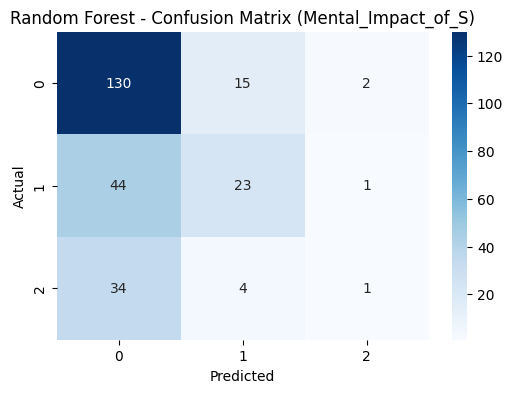

📋 Random Forest - Confusion Matrix (Mental_Impact_of_S):
          Predicted 0  Predicted 1  Predicted 2
Actual 0          130           15            2
Actual 1           44           23            1
Actual 2           34            4            1


In [43]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest - Confusion Matrix (Mental_Impact_of_S)")

# Generate the confusion matrix in table format
cm = confusion_matrix(y_test, y_pred_rf)

# Optionally get the label names if it's multiclass
labels = sorted(list(set(y_test)))  # or y_test.unique()

# Create a readable DataFrame
cm_table = pd.DataFrame(cm, 
                        index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print it
print("📋 Random Forest - Confusion Matrix (Mental_Impact_of_S):")
print(cm_table)

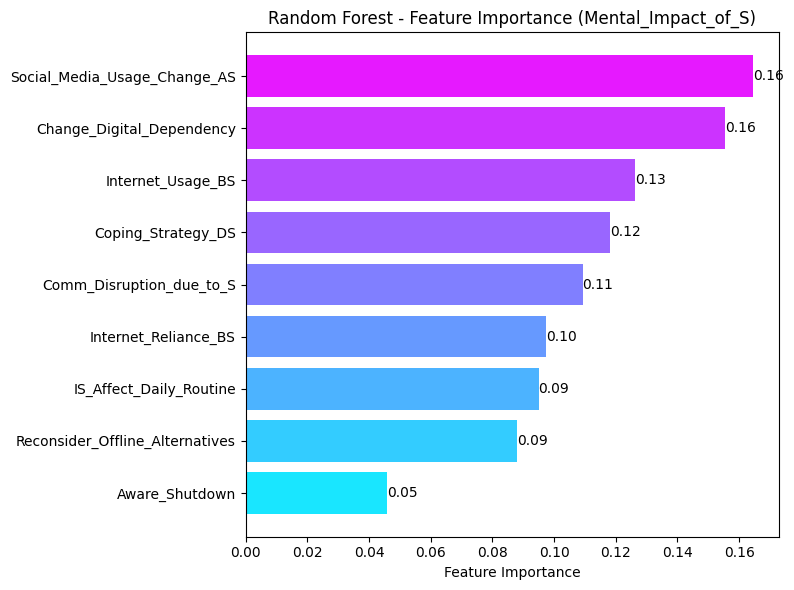


📊Random Forest - Feature Importance (Mental_Impact_of_S):
                        Feature  Importance
   Social_Media_Usage_Change_AS    0.164595
      Change_Digital_Dependency    0.155514
              Internet_Usage_BS    0.126269
             Coping_Strategy_DS    0.118059
       Comm_Disruption_due_to_S    0.109261
           Internet_Reliance_BS    0.097310
        IS_Affect_Daily_Routine    0.094989
Reconsider_Offline_Alternatives    0.088132
                 Aware_Shutdown    0.045872


In [44]:
# Feature Importance Plot
plot_feature_importance(best_rf_model.feature_importances_, X.columns, "Random Forest - Feature Importance (Mental_Impact_of_S)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (Mental_Impact_of_S):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

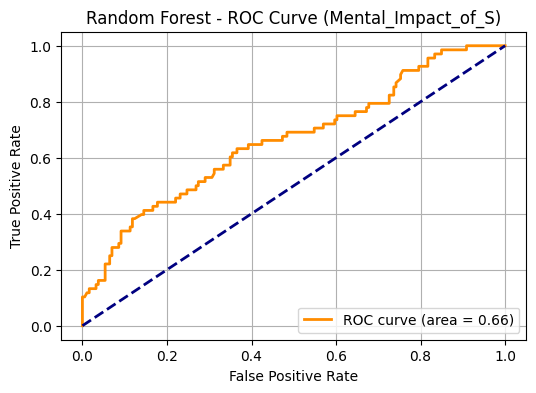

In [45]:
# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_rf_model, "predict_proba"):
    y_proba_rf = best_rf_model.predict_proba(X_test)
    if y_proba_rf.shape[1] > 2:
        # For multi-class: Choose one class vs rest (example: class 1)
        y_score_rf = y_proba_rf[:, 1]
    else:
        y_score_rf = y_proba_rf[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test, y_score_rf, "Random Forest - ROC Curve (Mental_Impact_of_S)")
    
    # Precision-Recall Curve
    # plot_precision_recall(y_test, y_score_rf, "Random Forest - Precision-Recall Curve (Mental_Impact_of_S)")

In [46]:
"""
# --- Learning Curve: Training vs Testing Accuracy ---
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Accuracy')
plt.title('Random Forest - Learning Curve (Mental_Impact_of_S)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
"""

"\n# --- Learning Curve: Training vs Testing Accuracy ---\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(\n    best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,\n    train_sizes=np.linspace(0.1, 1.0, 10)\n)\n\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\n\nplt.figure(figsize=(8,6))\nplt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy')\nplt.plot(train_sizes, test_scores_mean, 'o-', label='Testing Accuracy')\nplt.title('Random Forest - Learning Curve (Mental_Impact_of_S)')\nplt.xlabel('Training Set Size')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid()\nplt.show()\n"

Step 4.5.9: XGBoost Model Training + Hyperparameter Tuning (Mental_Impact_of_S)

In [47]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # Using softprob for probabilities (needed for AUC, PR curves)
    num_class=len(np.unique(y_train)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb.fit(X_train, y_train)

# Best model from grid search
best_xgb_model = grid_search_xgb.best_estimator_

print("✅ XGBoost tuning complete!")
print("🔹 Best Parameters:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


✅ XGBoost tuning complete!
🔹 Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Step 4.5.10: XGBoost Model Evaluation + All Visualizations (Mental_Impact_of_S)

In [48]:
# XGBoost full evaluation without early stopping (safe for your version)

# Predict on test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Test Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy:.4f}")

# Predict on train set
y_train_pred_xgb = best_xgb_model.predict(X_train)

# Train Accuracy
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

✅ XGBoost Test Accuracy: 0.6339
✅ XGBoost Train Accuracy: 0.6950

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       147
           1       0.57      0.40      0.47        68
           2       0.50      0.10      0.17        39

    accuracy                           0.63       254
   macro avg       0.58      0.46      0.46       254
weighted avg       0.61      0.63      0.59       254



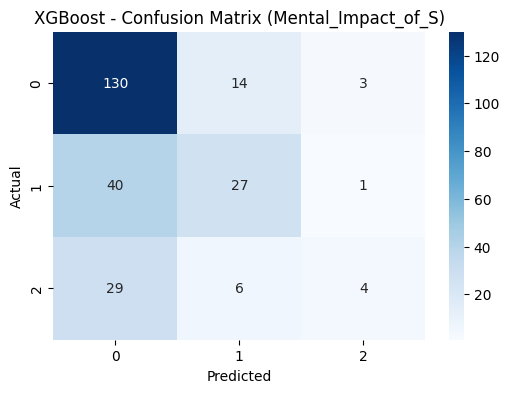

📋 Confusion Matrix Table: XGBoost (Mental_Impact_of_S)
          Predicted 0  Predicted 1  Predicted 2
Actual 0          130           14            3
Actual 1           40           27            1
Actual 2           29            6            4


In [49]:
# Confusion Matrix Heatmap
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost - Confusion Matrix (Mental_Impact_of_S)")

# Generate confusion matrix in table format
cm = confusion_matrix(y_test, y_pred_xgb)

# Get sorted labels from actual values
labels = sorted(list(set(y_test)))

# Create a labeled DataFrame
cm_table = pd.DataFrame(cm,
                        index=[f"Actual {label}" for label in labels],
                        columns=[f"Predicted {label}" for label in labels])

# Print confusion matrix as a table
print("📋 Confusion Matrix Table: XGBoost (Mental_Impact_of_S)")
print(cm_table)

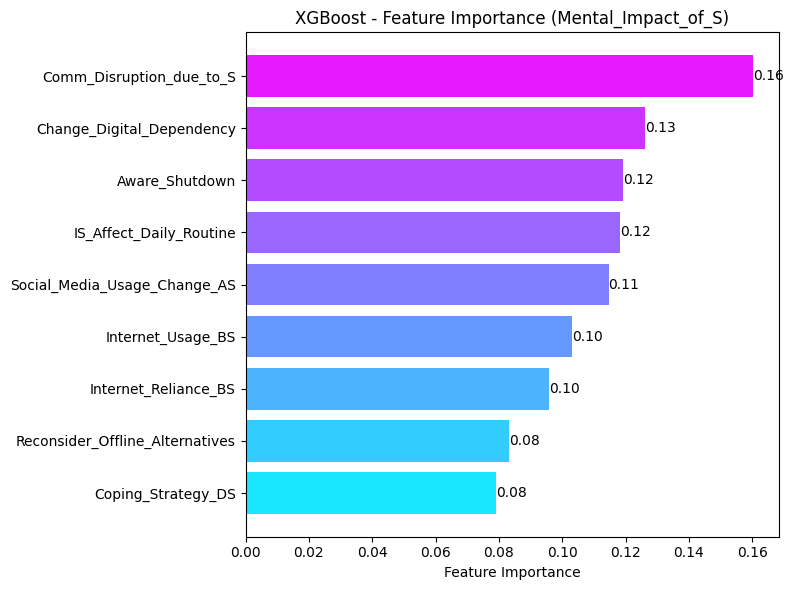


📊XGBoost - Feature Importance (Mental_Impact_of_S):
                        Feature  Importance
       Comm_Disruption_due_to_S    0.160320
      Change_Digital_Dependency    0.126251
                 Aware_Shutdown    0.119337
        IS_Affect_Daily_Routine    0.118239
   Social_Media_Usage_Change_AS    0.114623
              Internet_Usage_BS    0.102980
           Internet_Reliance_BS    0.095870
Reconsider_Offline_Alternatives    0.083294
             Coping_Strategy_DS    0.079086


In [50]:
# Feature Importance Plot
plot_feature_importance(best_xgb_model.feature_importances_, X.columns, "XGBoost - Feature Importance (Mental_Impact_of_S)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (Mental_Impact_of_S):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

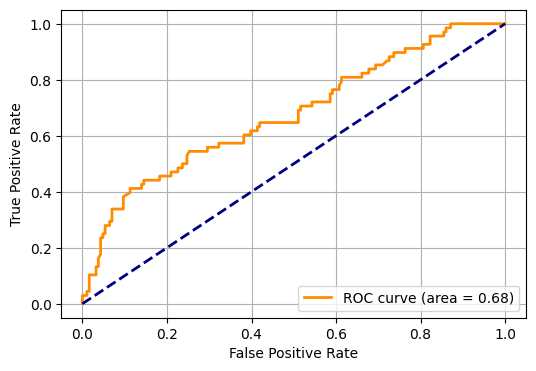

In [51]:

# --- Probabilities for ROC and Precision-Recall Curves ---
if hasattr(best_xgb_model, "predict_proba"):
    y_proba_xgb = best_xgb_model.predict_proba(X_test)
    if y_proba_xgb.shape[1] > 2:
        y_score_xgb = y_proba_xgb[:, 1]  # Class 1 probabilities
    else:
        y_score_xgb = y_proba_xgb[:, 1]
    
    # AUC-ROC Curve
    plot_roc_auc(y_test, y_score_xgb, "")
    

    # Precision-Recall Curve
    # plot_precision_recall(y_test, y_score_xgb, "XGBoost - Precision-Recall Curve (Mental_Impact_of_S)")

# ROC Curve – XGBoost Model (Mental Health Impact of Shutdown)

Step 4.5.11: Splitting Data for Second Target Variable (Lasting_Impact_on_MH)

In [52]:
# Define features (X2) and new target (y2) for second dependent variable
X2 = df_encoded.drop(columns=['Mental_Impact_of_S', 'Lasting_Impact_on_MH'])
y2 = df_encoded['Lasting_Impact_on_MH']

# Train/Test split (80% train, 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Show split result
print("✅ Data split completed for Future_Civic_Engagement_if_ASO!")
print("🔹 X_train2 shape:", X_train2.shape)
print("🔹 X_test2 shape:", X_test2.shape)
print("🔹 y_train2 shape:", y_train2.shape)
print("🔹 y_test2 shape:", y_test2.shape)


✅ Data split completed for Future_Civic_Engagement_if_ASO!
🔹 X_train2 shape: (1013, 9)
🔹 X_test2 shape: (254, 9)
🔹 y_train2 shape: (1013,)
🔹 y_test2 shape: (254,)


Step 4.5.12: Random Forest Model Training + Hyperparameter Tuning (Lasting_Impact_on_MH)

In [53]:
# Define fresh Random Forest model
rf_model2 = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_rf2 = GridSearchCV(
    estimator=rf_model2,
    param_grid=param_grid_rf2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf2.fit(X_train2, y_train2)

# Best model
best_rf_model2 = grid_search_rf2.best_estimator_

print("✅ Random Forest tuning complete for Lasting_Impact_on_MH!")
print("🔹 Best Parameters:", grid_search_rf2.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Random Forest tuning complete for Lasting_Impact_on_MH!
🔹 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Step 4.5.13: Random Forest Evaluation + All Visualizations (Lasting_Impact_on_MH)

In [54]:
# Predict
y_pred_rf2 = best_rf_model2.predict(X_test2)

# Test Accuracy
rf_accuracy2 = accuracy_score(y_test2, y_pred_rf2)
print(f"✅ Random Forest Test Accuracy: {rf_accuracy2:.4f}")

# Train Accuracy
y_train_pred_rf2 = best_rf_model2.predict(X_train2)
train_accuracy_rf2 = accuracy_score(y_train2, y_train_pred_rf2)
print(f"✅ Random Forest Train Accuracy: {train_accuracy_rf2:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test2, y_pred_rf2))

✅ Random Forest Test Accuracy: 0.5236
✅ Random Forest Train Accuracy: 0.7147

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.52      0.51        95
           1       0.53      0.65      0.59       118
           2       0.64      0.17      0.27        41

    accuracy                           0.52       254
   macro avg       0.56      0.45      0.45       254
weighted avg       0.54      0.52      0.51       254



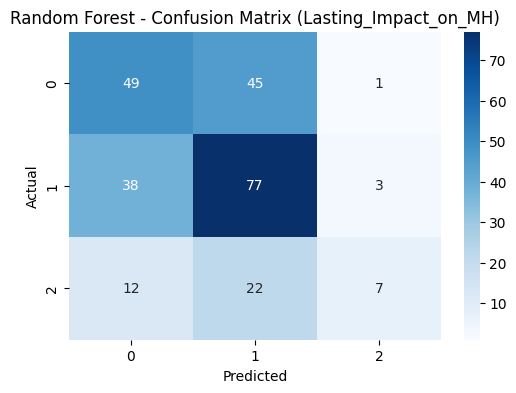

📋 Random Forest - Confusion Matrix (Lasting_Impact_on_MH)
          Predicted 0  Predicted 1  Predicted 2
Actual 0           49           45            1
Actual 1           38           77            3
Actual 2           12           22            7


In [55]:
# Confusion Matrix
plot_confusion_matrix(y_test2, y_pred_rf2, "Random Forest - Confusion Matrix (Lasting_Impact_on_MH)")


# Compute confusion matrix in table format
cm = confusion_matrix(y_test2, y_pred_rf2)

# Get label names
labels = sorted(list(set(y_test2)))  # Ensure consistent ordering

# Create DataFrame for display
cm_table = pd.DataFrame(cm, 
                        index=[f"Actual {label}" for label in labels], 
                        columns=[f"Predicted {label}" for label in labels])

# Print the confusion matrix
print("📋 Random Forest - Confusion Matrix (Lasting_Impact_on_MH)")
print(cm_table)

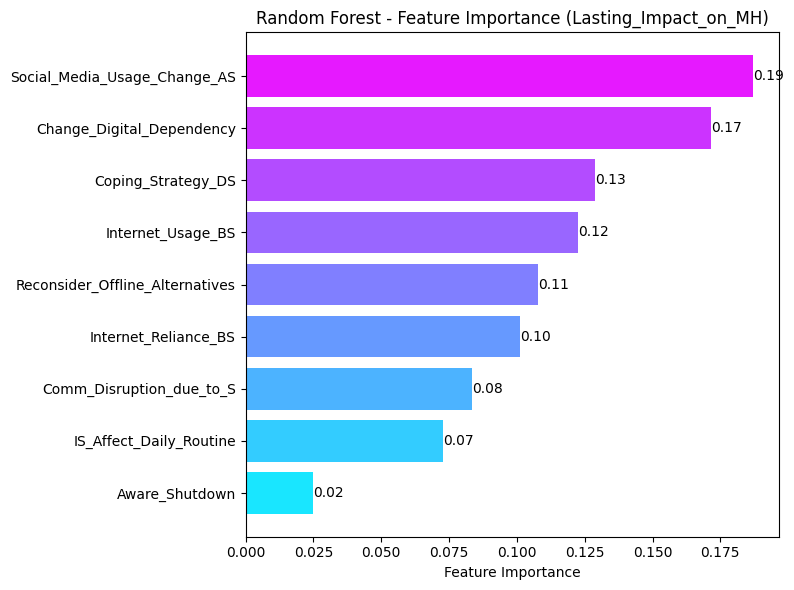


📊Random Forest - Feature Importance (Lasting_Impact_on_MH):
                        Feature  Importance
   Social_Media_Usage_Change_AS    0.187128
      Change_Digital_Dependency    0.171602
             Coping_Strategy_DS    0.128911
              Internet_Usage_BS    0.122612
Reconsider_Offline_Alternatives    0.107677
           Internet_Reliance_BS    0.101011
       Comm_Disruption_due_to_S    0.083481
        IS_Affect_Daily_Routine    0.072774
                 Aware_Shutdown    0.024803


In [56]:
# Feature Importance
plot_feature_importance(best_rf_model2.feature_importances_, X2.columns, "Random Forest - Feature Importance (Lasting_Impact_on_MH)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊Random Forest - Feature Importance (Lasting_Impact_on_MH):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

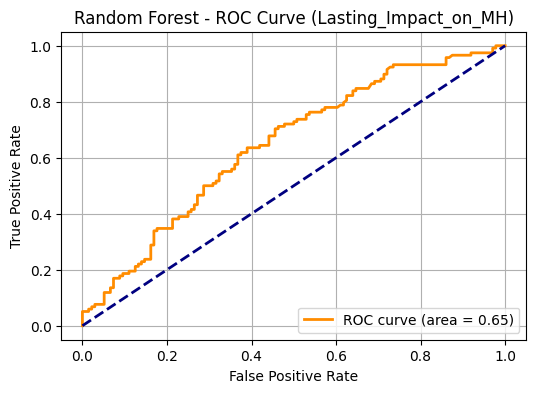

In [57]:
# Probabilities for ROC and PR curves
if hasattr(best_rf_model2, "predict_proba"):
    y_proba_rf2 = best_rf_model2.predict_proba(X_test2)
    if y_proba_rf2.shape[1] > 2:
        y_score_rf2 = y_proba_rf2[:, 1]
    else:
        y_score_rf2 = y_proba_rf2[:, 1]
        
    plot_roc_auc(y_test2, y_score_rf2, "Random Forest - ROC Curve (Lasting_Impact_on_MH)")
    # plot_precision_recall(y_test2, y_score_rf2, "Random Forest - Precision-Recall Curve (Lasting_Impact_on_MH)")


Step 4.5.14: XGBoost Model Training + Hyperparameter Tuning (Lasting_Impact_on_MH)

In [58]:
# Define fresh XGBoost model
xgb_model2 = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train2)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Define hyperparameter grid
param_grid_xgb2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search_xgb2 = GridSearchCV(
    estimator=xgb_model2,
    param_grid=param_grid_xgb2,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_xgb2.fit(X_train2, y_train2)

# Best model
best_xgb_model2 = grid_search_xgb2.best_estimator_

print("✅ XGBoost tuning complete for Lasting_Impact_on_MH!")
print("🔹 Best Parameters:", grid_search_xgb2.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ XGBoost tuning complete for Lasting_Impact_on_MH!
🔹 Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


Step 4.5.15: XGBoost Evaluation (Lasting_Impact_on_MH)

In [59]:
# Predict
y_pred_xgb2 = best_xgb_model2.predict(X_test2)

# Test Accuracy
xgb_accuracy2 = accuracy_score(y_test2, y_pred_xgb2)
print(f"✅ XGBoost Test Accuracy: {xgb_accuracy2:.4f}")

# Train Accuracy
y_train_pred_xgb2 = best_xgb_model2.predict(X_train2)
train_accuracy_xgb2 = accuracy_score(y_train2, y_train_pred_xgb2)
print(f"✅ XGBoost Train Accuracy: {train_accuracy_xgb2:.4f}")

# Classification Report
print("\n🔹 Classification Report:\n")
print(classification_report(y_test2, y_pred_xgb2))

✅ XGBoost Test Accuracy: 0.5276
✅ XGBoost Train Accuracy: 0.6910

🔹 Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.56      0.53        95
           1       0.54      0.63      0.58       118
           2       0.58      0.17      0.26        41

    accuracy                           0.53       254
   macro avg       0.54      0.45      0.46       254
weighted avg       0.53      0.53      0.51       254



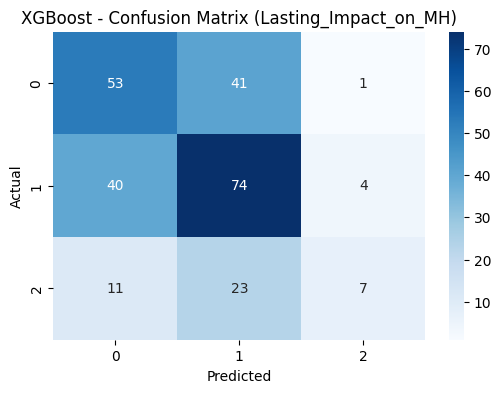

📋 XGBoost - Confusion Matrix (Lasting_Impact_on_MH)
          Predicted 0  Predicted 1  Predicted 2
Actual 0           53           41            1
Actual 1           40           74            4
Actual 2           11           23            7


In [60]:
# Confusion Matrix
plot_confusion_matrix(y_test2, y_pred_xgb2, "XGBoost - Confusion Matrix (Lasting_Impact_on_MH)")


# Compute confusion matrix
cm = confusion_matrix(y_test2, y_pred_xgb2)

# Define sorted labels (from your data)
labels = sorted(list(set(y_test2)))

# Create DataFrame
cm_table = pd.DataFrame(cm, 
                        index=[f"Actual {label}" for label in labels], 
                        columns=[f"Predicted {label}" for label in labels])

# Display the confusion matrix as table
print("📋 XGBoost - Confusion Matrix (Lasting_Impact_on_MH)")
print(cm_table)

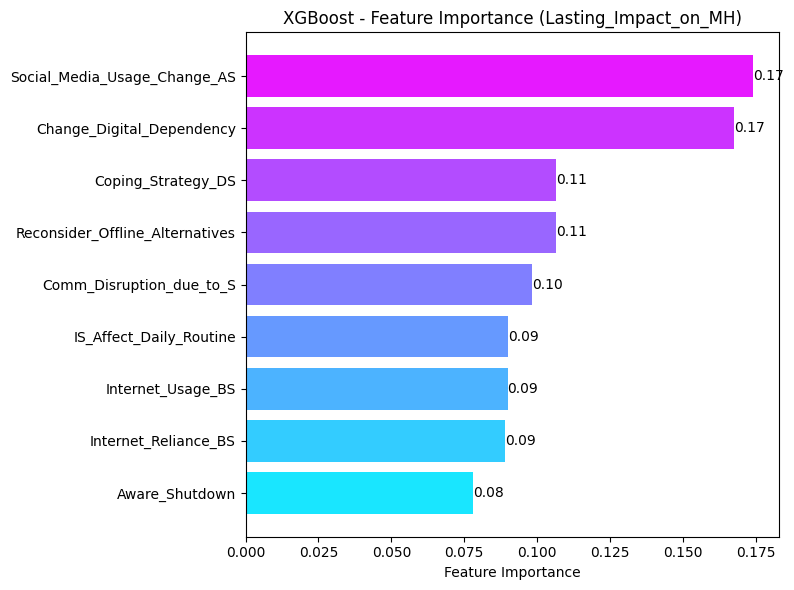


📊XGBoost - Feature Importance (Lasting_Impact_on_MH):
                        Feature  Importance
   Social_Media_Usage_Change_AS    0.174161
      Change_Digital_Dependency    0.167550
             Coping_Strategy_DS    0.106587
Reconsider_Offline_Alternatives    0.106362
       Comm_Disruption_due_to_S    0.098360
        IS_Affect_Daily_Routine    0.090138
              Internet_Usage_BS    0.089844
           Internet_Reliance_BS    0.089128
                 Aware_Shutdown    0.077870


In [61]:
# Feature Importance
plot_feature_importance(best_xgb_model2.feature_importances_, X2.columns, "XGBoost - Feature Importance (Lasting_Impact_on_MH)")


# --- ✅ Feature Importance Table ---
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📊XGBoost - Feature Importance (Lasting_Impact_on_MH):")
print(feature_importances_df.to_string(index=False))  # Clean, tabular display

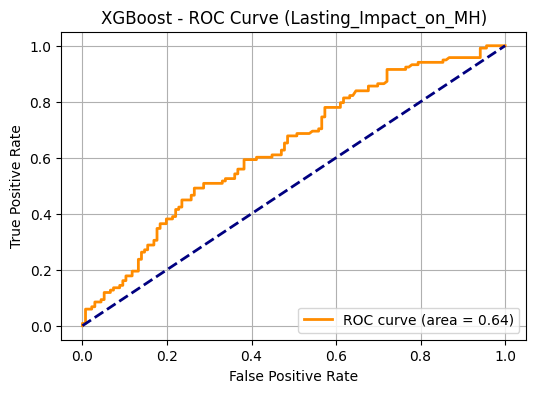

In [62]:

# Probabilities for ROC and PR curves
if hasattr(best_xgb_model2, "predict_proba"):
    y_proba_xgb2 = best_xgb_model2.predict_proba(X_test2)
    if y_proba_xgb2.shape[1] > 2:
        y_score_xgb2 = y_proba_xgb2[:, 1]
    else:
        y_score_xgb2 = y_proba_xgb2[:, 1]
        
    plot_roc_auc(y_test2, y_score_xgb2, "XGBoost - ROC Curve (Lasting_Impact_on_MH)")
    # plot_precision_recall(y_test2, y_score_xgb2, "XGBoost - Precision-Recall Curve (Lasting_Impact_on_MH)")


Step 4.5.16: Summary table of all models

In [63]:
# Define the data manually (put your accuracy numbers here!)
summary_data = {
    'Target Variable': [
        'Mental_Impact_of_S', 'Mental_Impact_of_S',
        'Lasting_Impact_on_MH', 'Lasting_Impact_on_MH'
    ],
    'Model': [
        'Random Forest', 'XGBoost',
        'Random Forest', 'XGBoost'
    ],
    'Train Accuracy': [
        train_accuracy_rf, train_accuracy_xgb,
        train_accuracy_rf2, train_accuracy_xgb2
    ],
    'Test Accuracy': [
        rf_accuracy, xgb_accuracy,
        rf_accuracy2, xgb_accuracy2
    ]
}

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

# Display table
print("✅ Model Summary Table:")
display(summary_df)

# Optionally: Save it to Excel if you want
#summary_df.to_excel("Model_Summary_Table.xlsx", index=False)
#print("✅ Saved to Model_Summary_Table.xlsx!")

✅ Model Summary Table:


,Target Variable,Model,Train Accuracy,Test Accuracy
0,Mental_Impact_of_S,Random Forest,0.739388,0.606299
1,Mental_Impact_of_S,XGBoost,0.694965,0.633858
2,Lasting_Impact_on_MH,Random Forest,0.714709,0.523622
3,Lasting_Impact_on_MH,XGBoost,0.691017,0.527559


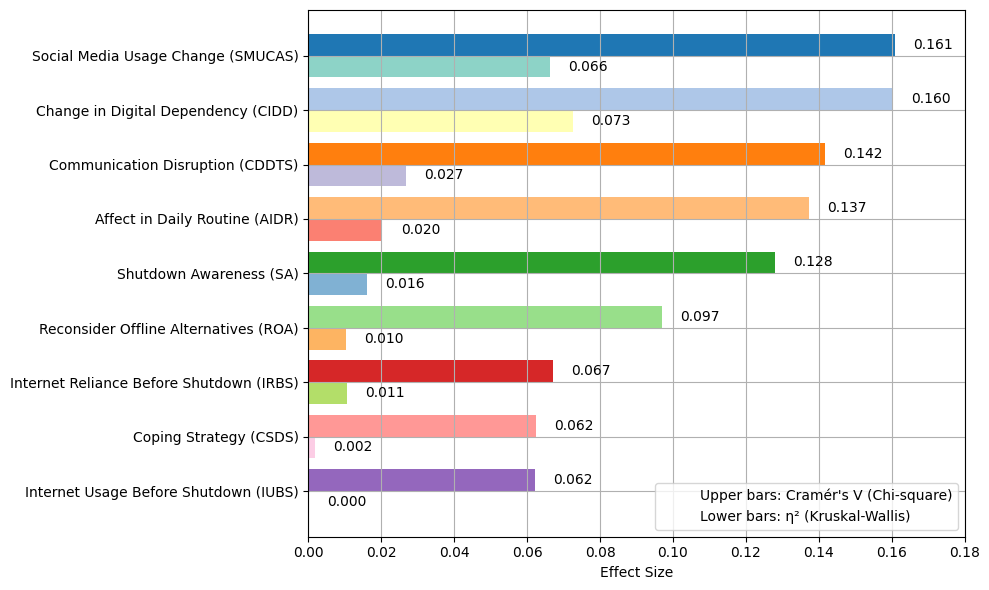

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

variables = [
    "Shutdown Awareness (SA)",
    "Internet Reliance Before Shutdown (IRBS)",
    "Internet Usage Before Shutdown (IUBS)",
    "Affect in Daily Routine (AIDR)",
    "Change in Digital Dependency (CIDD)",
    "Reconsider Offline Alternatives (ROA)",
    "Communication Disruption (CDDTS)",
    "Social Media Usage Change (SMUCAS)",
    "Coping Strategy (CSDS)"
]

cramers_v = [
    0.1279,
    0.0671,
    0.0621,
    0.1372,
    0.1604,
    0.0971,
    0.1417,
    0.1608,
    0.0624
]

eta_squared = [
    0.0161,
    0.0106,
    0.0,
    0.0203,
    0.0726,
    0.0104,
    0.0267,
    0.0662,
    0.0019
]

eta_squared = [max(0, val) for val in eta_squared]

sorted_indices = np.argsort(cramers_v)[::-1]
sorted_vars = [variables[i] for i in sorted_indices]
sorted_cramers = [cramers_v[i] for i in sorted_indices]
sorted_eta = [eta_squared[i] for i in sorted_indices]

y_pos = np.arange(len(variables))
bar_width = 0.4

plt.figure(figsize=(10, 6))

colors_cramers = plt.cm.tab20.colors[:len(variables)]
colors_eta = plt.cm.Set3.colors[:len(variables)]

for i in range(len(variables)):
    plt.barh(y_pos[i] - bar_width/2, sorted_cramers[i], height=bar_width, color=colors_cramers[i])
    plt.barh(y_pos[i] + bar_width/2, sorted_eta[i], height=bar_width, color=colors_eta[i])

plt.yticks(y_pos, sorted_vars)
plt.xlabel("Effect Size")
plt.title("") #Effect Sizes of Predictors on Mental Impact of Shutdowns

# Legend with no colors, just text lines
legend_elements = [
    Line2D([0], [0], color='none', label="Upper bars: Cramér's V (Chi-square)"),
    Line2D([0], [0], color='none', label="Lower bars: η² (Kruskal-Wallis)")
]
plt.legend(handles=legend_elements, loc='lower right')

for i in range(len(variables)):
    plt.text(sorted_cramers[i] + 0.005, y_pos[i] - bar_width/2, f"{sorted_cramers[i]:.3f}", va='center', color='black')
    plt.text(sorted_eta[i] + 0.005, y_pos[i] + bar_width/2, f"{sorted_eta[i]:.3f}", va='center', color='black')

plt.xlim(0, 0.18)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.grid(True)
plt.show()
